In [1]:
import pandas as pd 
import os 
pd.options.mode.chained_assignment = None
import numpy as np

We first have to import the packages for us to do our analysis. 

Pandas and numpy will allow us to perform data manipulation. 

In [2]:
import os

years = range(1995, 2005) 

#For years 2001 and 2002 
special_name = "removedSC"  

# create dictionary to store the data 
ten_years = {}

# get the current directory
directory = os.getcwd()

# to store the datasets as a dictionary
for year in years:
    if year == 2001 or year == 2002:
        file = f"{year}{special_name}.csv"
    else:
        file = f"{year}.csv"
    
    file_path = os.path.join(directory, file)
    ten_years[str(year)] = pd.read_csv(file_path)


D:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (22) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


As previously noticed in R, there were various instances of the TailNum containing special characters that will prevent the file from reading in Python, thus I removed those instances using R and then renamed these files as 2001removedSC and 2002removedSC.

Since the years chosen are 1995-2004, we specify these using the range function and we have to include up to 2005 since the range function includes the first item on the list and stops before 2005.

Using the for loop, together with the if_else function for 2001 and 2002, we append the mentioned years to the .csv as a string such that it contains the same naming convention as the files containing the dataset and we then read it in. 

After this step is done, we create the file path by using the os.path.join function to create the file path where the csv files are located by combining the current working directory and the file names together such that it creates the format for example : User/Downloads/1995.csv . 

The pd.read_csv function is then used to load the csv files in and are then separated in the dictionary using the individual years as the key. The key will allow us to easily view/print dataframes that we want by using the years indicating the years that we want with the square brackets. 

Since python is unlike R where we are unable to click on the lists/dataframes to view, using the dictionary will be able to help us view the dataframes that we want to see without having to use filters if all 10 years were combined in a single data frame. 

In [3]:
for year, df in ten_years.items():
    # Remove '-' and '@' from the 'Column1' column in each DataFrame
    df['TailNum'] = df['TailNum'].str.replace('-', '').str.replace('@', '')
    # Update the DataFrame in the dictionary
    ten_years[year] = df


As observed from R, there were some rows where the TailNum contained such special characters. In order to ensure that we can perform the merge with TailNum, we remove these so that the merge will be as accurate as possible. 

In [5]:
for year, df in ten_years.items():
    # Filter the DataFrame for rows where 'Cancelled' and 'Diverted' are equal to 0
    filtered_df = df[(df['Cancelled'] == 0) & (df['Diverted'] == 0)]
    
    # Print the number of NA values for the filtered DataFrame
    print(f"NA values for {year} where Cancelled and Diverted are 0:")
    print(filtered_df.isna().sum())


NA values for 1995 where Cancelled and Diverted are 0:
Year                       0
Month                      0
DayofMonth                 0
DayOfWeek                  0
DepTime                    0
CRSDepTime                 0
ArrTime                    0
CRSArrTime                 0
UniqueCarrier              0
FlightNum                  0
TailNum                    0
ActualElapsedTime          0
CRSElapsedTime             0
AirTime                    0
ArrDelay                   0
DepDelay                   0
Origin                     0
Dest                       0
Distance                5898
TaxiIn                     0
TaxiOut                    0
Cancelled                  0
CancellationCode     5225038
Diverted                   0
CarrierDelay         5225038
WeatherDelay         5225038
NASDelay             5225038
SecurityDelay        5225038
LateAircraftDelay    5225038
dtype: int64
NA values for 1996 where Cancelled and Diverted are 0:
Year                       0
Month  

NA values for 2004 where Cancelled and Diverted are 0:
Year                       0
Month                      0
DayofMonth                 0
DayOfWeek                  0
DepTime                    0
CRSDepTime                 0
ArrTime                    0
CRSArrTime                 0
UniqueCarrier              0
FlightNum                  0
TailNum                    0
ActualElapsedTime          0
CRSElapsedTime             0
AirTime                    0
ArrDelay                   0
DepDelay                   0
Origin                     0
Dest                       0
Distance                   0
TaxiIn                     0
TaxiOut                    0
Cancelled                  0
CancellationCode     6987722
Diverted                   0
CarrierDelay               0
WeatherDelay               0
NASDelay                   0
SecurityDelay              0
LateAircraftDelay          0
dtype: int64


Since our analysis will be based on delays, we will be comparing this based on flights that were confirmed. Cancelled or Diverted flights should be in a category of its own since there is no similar form of comparison with flights that face actual delays due to operational or weather issues.

We then filter down the data to see the NA or missing values in the dataframe for each year. In order to clearly indicate which dataframe it belongs to, we use the F string to print out the NA values for each year. 

Using the is.na.sum() function, we are given the summary of the total number of NA values for each column. After a quick glance, we can ignore the CancellationCode since these are flights that were not cancelled or diverted. 

We are looking for NA values that would affect our analysis such as the Distance, AirTime and Tailnum since these could allow us to potentially identify whether the overall distance travelled could cause more wear and tear to certain planes, and most importantly we try to fill these up as accurately as possible for our analysis regarding the time caused by delays.

For cancelled and diverted flights, we assume that there are special reasons and not caused due to delays but other factors such as airport congestion or serious weather conditions. 

## To convert time values into proper format

In [4]:
##convert time format properly so that we can classify them later on 
def convert_time(time_int):
    return time_int - 2400 if time_int >= 2400 else time_int

for year, df in ten_years.items():
    non_cancelled_diverted = df[(df['Cancelled'] == 0) & (df['Diverted'] == 0)]

    for column in ["DepTime", "ArrTime",'CRSDepTime','CRSArrTime']: 
        non_cancelled_diverted[column] = non_cancelled_diverted[column].astype('int64')
        non_cancelled_diverted[column] = non_cancelled_diverted[column].apply(convert_time)
        non_cancelled_diverted[column]= non_cancelled_diverted[column].astype(str).str.zfill(4)

    ten_years[year].update(non_cancelled_diverted)



In order to convert time to proper format, as there are too many columns with NA if we include flights that were cancelled and diverted, rather than exclude these rows completely, we filter down to only amend those values where flights were not cancelled or diverted. 

We create a function called convert time where the aim is to display the all time columns in proper format where if time is more than or equal to 2400, we deduct 2400 from it this is so that if there are values such as 2500, deducting 2400 will give us 0100. This is important as we need to classify the time values later on. 

We use a for loop on the dataframes in the ten_years dictionary and specify the time columns that need to be amended. We  first have convert all time formats into int64 so that if there is a need for calculation to be performed later on, we can do this easily by converting it into datetime format. Since we only need to use the convert_time function only on values where the time is more than or equal to 2400, there is no need for us to insert leading zeroes into the time columns before using the function. 

Adding leading zeroes is also important as if there is a need to convert these columns into datetime format later on, it can be recognized in the format HHMM. 

After these steps are done, we use the update function to place these converted time columns back into the original dictionary. 

## Updating missing Distances and AirTime values

In [16]:
#identify columns with missing values for flights that were not cancelled or diverted
for year, df in ten_years.items():
    ncd_df = df[(df['Cancelled'] == 0) & (df['Diverted'] == 0)]
    print(f"Missing values for year {year}:")
    print(ncd_df.isna().sum())

Missing values for year 1995:
Year                       0
Month                      0
DayofMonth                 0
DayOfWeek                  0
DepTime                    0
CRSDepTime                 0
ArrTime                    0
CRSArrTime                 0
UniqueCarrier              0
FlightNum                  0
TailNum                    0
ActualElapsedTime          0
CRSElapsedTime             0
AirTime                    0
ArrDelay                   0
DepDelay                   0
Origin                     0
Dest                       0
Distance                5898
TaxiIn                     0
TaxiOut                    0
Cancelled                  0
CancellationCode     5225038
Diverted                   0
CarrierDelay         5225038
WeatherDelay         5225038
NASDelay             5225038
SecurityDelay        5225038
LateAircraftDelay    5225038
dtype: int64
Missing values for year 1996:
Year                       0
Month                      0
DayofMonth                 0

In [5]:
columns = ['Origin', 'Dest', 'Distance','AirTime']

for years, df in  ten_years.items(): 
    All_records = df[columns].copy()
    All_records.drop_duplicates(inplace = True)

In this chunk of code, we are trying to get the all possible combinations of Origin and Destinations while also identifying all possible AirTimes for each route, so that we can then use these AirTime values to calculate the mean or median should there be any rows that contain these missing AirTimes. 

We specify the columns that we want to keep in a list, in this case the Origin, Dest, Distance and AirTime. We then use a for loop to access the ten_years dictionary to access only the specified columns and to drop any duplicate rows. 

This gives us essentially a masterlist, where we get all possible flight combinations and distances that we can use to fill up the rows that contain any missing Distances or AirTime based on the information over the 10 years.

In [5]:
## now we have all unique airports 
print(All_records)

        Origin Dest  Distance  AirTime
0          ORD  CLT     599.0     80.0
1          ORD  CLT     599.0     78.0
2          ORD  CLT     599.0     88.0
4          ORD  CLT     599.0     87.0
5          ORD  CLT     599.0     81.0
...        ...  ...       ...      ...
7124979    PSP  ATL    1840.0    197.0
7125672    MOB  ATL     302.0     90.0
7126115    RNO  ATL    1993.0    218.0
7127998    RNO  ATL    1993.0    231.0
7128507    TPA  SLC    1887.0    246.0

[232755 rows x 4 columns]


In [6]:
filtered_df = ten_years['1995'][(ten_years['1995']['Cancelled'] == 0) & (ten_years['1995']['Diverted'] == 0)]

# Apply the operation only to filtered rows
filtered_df['Distance'] = filtered_df.apply(
    lambda row: All_records.loc[(All_records['Origin'] == row['Origin']) & (All_records['Dest'] == row['Dest']), 'Distance'].values[0]
                 if pd.isna(row['Distance']) and not All_records.loc[(All_records['Origin'] == row['Origin']) & (All_records['Dest'] == row['Dest'])].empty 
                 else row['Distance'],
    axis=1
)

# Update the main DataFrame with the modified 'Distance' values
ten_years['1995'].update(filtered_df)

As we were able to identify that the year containing the missing Distances is the year 1995 we use indexing and use that to filter along with flights that were not cancelled or diverted. 

We then access the Distance column from the filtered_df and apply the lambda function along with the .loc to find matches between the Origin and Dest column in All_records and the filtered_df. If there is match and the Distance is NA, then it fills the corresponding distance value. Otherwise, it remains as NA. 

Once this is done, we update these rows back into the ten_years dictionary and check if all the NA's have been solved.

In [13]:
for year, df in ten_years.items():
    ncd_df = df[(df['Cancelled'] == 0) & (df['Diverted'] == 0)]
    print(f"Missing values for year {year}:")
    print(ncd_df.isna().sum())

Missing values for year 1995:
Year                       0
Month                      0
DayofMonth                 0
DayOfWeek                  0
DepTime                    0
CRSDepTime                 0
ArrTime                    0
CRSArrTime                 0
UniqueCarrier              0
FlightNum                  0
TailNum                    0
ActualElapsedTime          0
CRSElapsedTime             0
AirTime                    0
ArrDelay                   0
DepDelay                   0
Origin                     0
Dest                       0
Distance                 120
TaxiIn                     0
TaxiOut                    0
Cancelled                  0
CancellationCode     5225038
Diverted                   0
CarrierDelay         5225038
WeatherDelay         5225038
NASDelay             5225038
SecurityDelay        5225038
LateAircraftDelay    5225038
dtype: int64
Missing values for year 1996:
Year                       0
Month                      0
DayofMonth                 0

In [10]:
pd.set_option('display.max_rows', None)


This is to see all possible combinations of Origin and Destination 

In [8]:
na_distance_rows_1995 = ten_years['1995'][(ten_years['1995']['Distance'].isna()) & 
                                           (ten_years['1995']['Cancelled'] == 0) & 
                                           (ten_years['1995']['Diverted'] == 0)]
na_distance_rows_1995_filtered = na_distance_rows_1995[['Origin', 'Dest', 'TailNum']]
print(na_distance_rows_1995_filtered)


        Origin Dest TailNum
4180508    DEN  LIT  N992UA
4180509    DEN  LIT  N998UA
4180510    DEN  LIT  N990UA
4180511    DEN  LIT  N989UA
4180512    DEN  LIT  N998UA
...        ...  ...     ...
4880377    LIT  DEN  N990UA
4880378    LIT  DEN  N995UA
4880379    LIT  DEN  N990UA
4880380    LIT  DEN  N976UA
4880381    LIT  DEN  N986UA

[241 rows x 3 columns]


In [ ]:
pd.reset_option('display.max_rows')


In [ ]:
## check if there is DEN or LIT in the all_records list 
# Filter rows where Origin is 'Den' and Destination is 'LIT'
filtered_records = All_records[(All_records['Origin'] == 'DEN') & (All_records['Dest'] == 'LIT')]

print(filtered_records)
## Since there are no such records, found online that DEN to LIT is 771 miles so fill these and DFW BFL is 1271


We double check if is is true that the All_records dataframe does not contain these Origin and Detinations. 

In [7]:
# Filter rows where 'Cancelled' and 'Diverted' are equal to 0
filtered_rows = ten_years['1995'][(ten_years['1995']['Cancelled'] == 0) & (ten_years['1995']['Diverted'] == 0)]

# fill the NA values with the distance 
filtered_rows.loc[filtered_rows['Origin'].isin(['DEN', 'LIT']), 'Distance'] = 771
filtered_rows.loc[filtered_rows['Origin'].isin(['BFL', 'DFW']), 'Distance'] = 1271

# updating the dataframe
ten_years['1995'].update(filtered_rows)



Using the airmiles calculator, once again filtering down to non-cancelled and diverted flights, we fill the missing distance basd on the information found. We then specify the condition using the isin function where if the Origin contains DEN or LIT to fill 771, otherwise if it contains BFL or DFW, then it should update the Distance column with 1271.

After this step is done, we update these rows back into the ten_years using the loc function 

## Updating missing TailNum

In [11]:
valid_columns = ['TailNum', 'CRSDepTime', 'FlightNum','Origin','Dest']

missing_tailnum = {}
for year, df in ten_years.items():
    # Filter rows where Cancelled and Diverted are both 0
    non_cancelled_diverted = df[(df['Cancelled'] == 0) & (df['Diverted'] == 0)]
    missing_tailnum_df = non_cancelled_diverted[valid_columns].copy()
    missing_tailnum_rows = missing_tailnum_df[missing_tailnum_df['TailNum'].isna()]
    missing_tailnum[year] = missing_tailnum_rows

for year, df in missing_tailnum.items():
    print(f"Missing tail numbers for year {year}:")
    print(df)



Missing tail numbers for year 1995:
Empty DataFrame
Columns: [TailNum, CRSDepTime, FlightNum, Origin, Dest]
Index: []
Missing tail numbers for year 1996:
Empty DataFrame
Columns: [TailNum, CRSDepTime, FlightNum, Origin, Dest]
Index: []
Missing tail numbers for year 1997:
Empty DataFrame
Columns: [TailNum, CRSDepTime, FlightNum, Origin, Dest]
Index: []
Missing tail numbers for year 1998:
Empty DataFrame
Columns: [TailNum, CRSDepTime, FlightNum, Origin, Dest]
Index: []
Missing tail numbers for year 1999:
Empty DataFrame
Columns: [TailNum, CRSDepTime, FlightNum, Origin, Dest]
Index: []
Missing tail numbers for year 2000:
Empty DataFrame
Columns: [TailNum, CRSDepTime, FlightNum, Origin, Dest]
Index: []
Missing tail numbers for year 2001:
Empty DataFrame
Columns: [TailNum, CRSDepTime, FlightNum, Origin, Dest]
Index: []
Missing tail numbers for year 2002:
Empty DataFrame
Columns: [TailNum, CRSDepTime, FlightNum, Origin, Dest]
Index: []
Missing tail numbers for year 2003:
        TailNum CRSD

In [8]:
# Filter rows based on conditions for origin, destination airports, and Cancelled and Diverted equal to 0
unique_tailnums = ten_years['2003'][(ten_years['2003']['Origin'].isin(['LGB', 'LAS'])) & 
                                      (ten_years['2003']['Dest'].isin(['LGB', 'LAS'])) &
                                      (ten_years['2003']['Cancelled'] == 0) & 
                                      (ten_years['2003']['Diverted'] == 0)]

# Get unique tail numbers for flights meeting the conditions
unique_tailnums = unique_tailnums[unique_tailnums['TailNum'].str.len() >= 4]['TailNum'].unique()
print(unique_tailnums)




['N523JB' 'N507JB' 'N520JB' 'N529JB' 'N542JB' 'N527JB' 'N504JB' 'N522JB'
 'N547JB' 'N552JB' 'N519JB' 'N553JB' 'N510JB' 'N521JB' 'N534JB' 'N533JB'
 'N536JB' 'N537JB' 'N508JB' 'N546JB' 'N506JB' 'N505JB' 'N517JB' 'N535JB'
 'N528JB' 'N531JB' 'N503JB' 'N524JB' 'N548JB' 'N543JB' 'N554JB' 'N516JB'
 'N509JB' 'N544JB' 'N550JB' 'N556JB' 'N526JB' 'N559JB' 'N561JB' 'N558JB'
 'N562JB' 'N563JB' 'N564JB' 'N566JB' 'N568JB' 'N565JB' 'N569JB' 'N570JB'
 'N579JB' 'N571JB' 'N580JB']


From above, we also identified that the year 2003 contains missing TailNums. In order to see the information that we need, we filter down to a few important columns that will give us the information that we need, the most important ones being the Origin and Destination. 

These missing TailNums all actually have the same Origin and Destination, thus in order to fill these values, we get all the unqiue TailNums that also go on this flight path. Using the isin function again, to check where Origin and Dest contain both LGB and LAS and where the flight was not Cancelled or Diverted. 

However as we may get a wide range of TailNums, and as previously mentioned where the plane_data.csv files only contains TailNums that contain at least 4 characters and thus we use that to narrow down the possible TailNums.

In [9]:
# find the row id of those that contain missing tailnum 
missing_tailnum_index = ten_years['2003'][(ten_years['2003']['Cancelled'] == 0) & 
                                          (ten_years['2003']['Diverted'] == 0) &
                                          (ten_years['2003']['TailNum'].isna())].index

# create a list based on the above tailnums that contain these origin and destination
filled_tailnums = list(unique_tailnums)  

# so that the list starts from 0 and we can run through it sequentially
tailnum_index = 0


for index in missing_tailnum_index:
    ten_years['2003'].loc[index, 'TailNum'] = filled_tailnums[tailnum_index]
    tailnum_index = (tailnum_index + 1) % len(filled_tailnums)  # use modulo to cycle through tail numbers




In order to fill up the missing TailNums, we first have to locate the indices of those that are missing. We then create unique_tailnums into a list that we will be using to fill up the missing TailNum values. We create the tailnum_index starting from 0 so that we can count down the TailNums used starting from the top of the list and using the modulo operation to restart from the top of the list should there be more missing values outside of the range of the list. 

## To fill missing AirTime values


In [10]:
#now want to see NA for AirTime 
na_airtime2002 = ten_years['2002'][ten_years['2002']['AirTime'].isna() & (ten_years['2002']['Cancelled'] == 0) & 
                                          (ten_years['2002']['Diverted'] == 0)]
na_airtime2002 = na_airtime2002[['Origin', 'Dest', 'TailNum']]

print(na_airtime2002)
# in this case we want to double check if there are other origin and destinations

        Origin Dest TailNum
1687170    ANC  ORD  N613AS
1687171    ANC  ORD  N613AS
1687172    ANC  ORD  N613AS
1687173    ANC  ORD  N626AS
1687174    ANC  ORD  N626AS
...        ...  ...     ...
2137104    ANC  ORD  N622AS
2137105    ANC  ORD  N626AS
2137106    ANC  ORD  N624AS
2137107    ANC  ORD  N619AS
2137108    ANC  ORD  N619AS

[121 rows x 3 columns]


We also located that the year 2002 contains missing AirTime values and we want to observe the Origin and Destination of these rows to see how we can fill them up. 

In [14]:
# to view all rows, remove 
pd.set_option('display.max_rows', None)
print(na_airtime2002)


        Origin Dest TailNum
1687170    ANC  ORD  N613AS
1687171    ANC  ORD  N613AS
1687172    ANC  ORD  N613AS
1687173    ANC  ORD  N626AS
1687174    ANC  ORD  N626AS
1687175    ANC  ORD  N626AS
1687176    ANC  ORD  N617AS
1687177    ANC  ORD  N618AS
1687178    ANC  ORD  N615AS
1687179    ANC  ORD  N607AS
1687180    ANC  ORD  N607AS
1687181    ANC  ORD  N607AS
1687182    ANC  ORD  N607AS
1687183    ANC  ORD  N607AS
1687184    ANC  ORD  N607AS
1687185    ANC  ORD  N607AS
1687186    ANC  ORD  N607AS
1687187    ANC  ORD  N607AS
1687188    ANC  ORD  N627AS
1687189    ANC  ORD  N627AS
1687190    ANC  ORD  N627AS
1687191    ANC  ORD  N613AS
1687192    ANC  ORD  N619AS
1687193    ANC  ORD  N607AS
1687194    ANC  ORD  N623AS
1687195    ANC  ORD  N623AS
1687196    ANC  ORD  N623AS
1687197    ORD  ANC  N613AS
1687198    ORD  ANC  N613AS
1687199    ORD  ANC  N613AS
1687200    ORD  ANC  N626AS
1687201    ORD  ANC  N626AS
1687202    ORD  ANC  N626AS
1687203    ORD  ANC  N617AS
1687204    ORD  ANC 

In [26]:
pd.reset_option('display.max_rows')


In [11]:
##now print all_records  
ORD_ANC = All_records[(All_records['Origin'] == 'ORD') & (All_records['Dest'] == 'ANC')]

print(ORD_ANC)

        Origin Dest  Distance  AirTime
502479     ORD  ANC    2846.0    367.0
502480     ORD  ANC    2846.0    369.0
502481     ORD  ANC    2846.0    368.0
502482     ORD  ANC    2846.0    363.0
502483     ORD  ANC    2846.0    378.0
...        ...  ...       ...      ...
6434760    ORD  ANC    2846.0    425.0
6434762    ORD  ANC    2846.0    413.0
6434763    ORD  ANC    2846.0    407.0
7039497    ORD  ANC    2846.0    392.0
7039500    ORD  ANC    2846.0    402.0

[88 rows x 4 columns]


As we have the masterlist, we are able to observe all possible flight durations from ORD and ANC and vice versa. Thus in order to fill these up, we use the median value for each of the Origin and Destination. We use the median AirTime here so that the value wont fluctuate too much due to outliers. 

In [12]:
median_airtime_ORDANC = ORD_ANC['AirTime'].median()
print(median_airtime_ORDANC)

372.0


In [13]:
# do same thing for ANC_ORD
ANC_ORD = All_records[(All_records['Origin'] == 'ANC') & (All_records['Dest'] == 'ORD')]
median_airtime_ANCORD = ANC_ORD['AirTime'].median()
print(median_airtime_ANCORD)

333.0


In [14]:
# fill these values in since have multiple conditions easier to separate then use inplace

ten_years['2002'].loc[(ten_years['2002']['Cancelled'] == 0) & 
                      (ten_years['2002']['Diverted'] == 0) & 
                      (ten_years['2002']['AirTime'].isna()) & 
                      (ten_years['2002']['Origin'] == 'ORD'), 'AirTime'] = 372


ten_years['2002'].loc[(ten_years['2002']['Cancelled'] == 0) & 
                      (ten_years['2002']['Diverted'] == 0) & 
                      (ten_years['2002']['AirTime'].isna()) & 
                      (ten_years['2002']['Origin'] == 'ANC'), 'AirTime'] = 333



After calculating both medians, we then fill them up using the filter where if the Origin is ORD then we fill the airtime with 372, otherwise if the Origin contains ANC then we fill it up with 333. 

## To calculate missing ArrDelay value 

In [15]:
# filter to find where the row where ArrDelay is NA
filtered_df = ten_years['2003'][(ten_years['2003']['ArrDelay'].isna()) & 
                                 (ten_years['2003']['Cancelled'] == 0) & 
                                 (ten_years['2003']['Diverted'] == 0)]

# Calculate the time difference in minutes for the filtered rows
filtered_df['ArrTime'] = pd.to_datetime(filtered_df['ArrTime'], format='%H%M')
filtered_df['CRSArrTime'] = pd.to_datetime(filtered_df['CRSArrTime'], format='%H%M')
filtered_df['ArrDelay'] = (filtered_df['ArrTime'] - filtered_df['CRSArrTime']).dt.total_seconds() / 60.0

# Update the 'ArrDelay' column in the main DataFrame with the calculated values
ten_years['2003'].update(filtered_df)



Since we have already changed the time based columns to be in the form of HHMM format, we can now easily use the datetime format to perform calculation of the ArrDelay where it is the difference between ArrTime and CRSArrtime. 

As there is no option to convert it to minutes directly, we use the dt.total_seconds and then divide it again by 60 to get the time difference in minutes. 

In [16]:
for year, df in ten_years.items():
    ncd_df = df[(df['Cancelled'] == 0) & (df['Diverted'] == 0)]
    print(f"Missing values for year {year}:")
    print(ncd_df.isna().sum())

Missing values for year 1995:
Year                       0
Month                      0
DayofMonth                 0
DayOfWeek                  0
DepTime                    0
CRSDepTime                 0
ArrTime                    0
CRSArrTime                 0
UniqueCarrier              0
FlightNum                  0
TailNum                    0
ActualElapsedTime          0
CRSElapsedTime             0
AirTime                    0
ArrDelay                   0
DepDelay                   0
Origin                     0
Dest                       0
Distance                   0
TaxiIn                     0
TaxiOut                    0
Cancelled                  0
CancellationCode     5225038
Diverted                   0
CarrierDelay         5225038
WeatherDelay         5225038
NASDelay             5225038
SecurityDelay        5225038
LateAircraftDelay    5225038
dtype: int64
Missing values for year 1996:
Year                       0
Month                      0
DayofMonth                 0

After everything is done, we run a check to see if all the NA values have been cleared and we can carry on with our analysis. 

## Start of analysis 

In [21]:
# to see if it is true that in general a DepDelay will also cause ArrDelay
correlation = {}

for year, df in ten_years.items():
    column1 = df['DepDelay']
    column2 = df['ArrDelay']
    correlation_coefficient = column1.corr(column2)
    # Store the correlation coefficient in the dictionary
    correlation[year] = correlation_coefficient


for year, correlation_coefficient in correlation.items():
    print(f"Correlation coefficient for year {year}: {correlation_coefficient}")


Correlation coefficient for year 1995: 0.8094477708028478
Correlation coefficient for year 1996: 0.856202443285542
Correlation coefficient for year 1997: 0.7945904564554089
Correlation coefficient for year 1998: 0.8219597540082767
Correlation coefficient for year 1999: 0.8332382268810937
Correlation coefficient for year 2000: 0.8972797446966404
Correlation coefficient for year 2001: 0.9069423315661908
Correlation coefficient for year 2002: 0.8909873280669838
Correlation coefficient for year 2003: 0.8625178855405563
Correlation coefficient for year 2004: 0.907447881120394


Since we want to perform our analysis based on the delays, instead of looking at DepDelays and ArrDelays separately, we  can first try to identify if there is correlation between them. Logically speaking, a DepDelay will probably lead to ArrDelay but in order to double confirm this, we use the corr function in pandas to see the strength between both columns for each year. As seen from above, every year has a coefficient that is more than 0.75, meaning that there is a strong correlation between DepDelay and ArrDelay. 

This means that we can look at DepDelays and ArrDelays together and calc them in terms of the average delays.

In [18]:

q1_analysis = ['CRSDepTime', 'DepDelay', 'ArrDelay']  # Adjust column names as needed

BestTOD = {}

for year, df in ten_years.items():
    ncd_df = df[(df['Cancelled'] == 0) & (df['Diverted'] == 0)]
    
    q1_df = ncd_df[q1_analysis].copy() 
    
    # Apply modification to the DataFrame
    q1_df['DepDelay'] = np.where(q1_df['DepDelay'] < -60, abs(q1_df['DepDelay']), q1_df['DepDelay'])
    q1_df['ArrDelay'] = np.where(q1_df['ArrDelay'] < -60, abs(q1_df['ArrDelay']), q1_df['ArrDelay'])
    
    # Store the modified DataFrame in the new dictionary
    BestTOD[year] = q1_df



In order to perform the analysis for the best time of day to travel to minimize delays, we first select only relevant columns which are CRSDepTime that we will use to classify the Time of Day and we will be using the DepDelay and ArrDelay columns to calculate the average delay for each time of day for each year.  We then use the for loop to select the columns that we want for each year and to create a copy of these so that we dont amend anything from the original dataframe.

As there are negative DepDelay and ArrDelay values, it may be normal  that the planes depart a few minuets earlier than expected and for cases where the Delays are in the high negative 3 digit range, those are clear that it was actually a Delay since the dataframe records it within the same row and recognizes it as a early departure. 



In [21]:
for year, df in BestTOD.items():
    df['timeofday'] = 'empty'
    df['CRSDepTime'] = df['CRSDepTime'].astype(int)

    # Update 'timeofday' based on conditions
    df.loc[(df['CRSDepTime'] >= 0) & (df['CRSDepTime'] < 600), 'timeofday'] = 'midnight'
    df.loc[(df['CRSDepTime'] >= 600) & (df['CRSDepTime'] < 1200), 'timeofday'] = 'morning'
    df.loc[(df['CRSDepTime'] >= 1200) & (df['CRSDepTime'] < 1800), 'timeofday'] = 'afternoon'
    df.loc[(df['CRSDepTime'] >= 1800) & (df['CRSDepTime'] < 2400), 'timeofday'] = 'evening'


Once we have created the dictionary for for the best time of day, we first create a new column time of day. We can start grouping them by time of day. We use the.loc function to directly access the rows and columns for CRSDepTime where it is classified as such: 

0600 - 1159 : morning flights 
1200- 1759 : afternoon flights 
1800 - 2359 - evening flights
0000 - 0559: midnight flights 

In [22]:
# Dictionary to store the average of the sum of DepDelay and ArrDelay for each year and time of day
average_delay_by_timeofday = {}

# Iterate over each year's DataFrame in the q1analysis dictionary
for year, df in BestTOD.items():
    # Sum the DepDelay and ArrDelay for each row
    df['TotalDelay'] = df['DepDelay'] + df['ArrDelay']
    
    # Group by 'timeofday' and calculate the mean of the total delay for each group
    average_delay_by_timeofday[year] = df.groupby('timeofday')['TotalDelay'].mean()

# Print the average of the sum of DepDelay and ArrDelay for each time of day for each year
for year, avg_delay_df in average_delay_by_timeofday.items():
    print(f"Year {year}:")
    print(avg_delay_df)

Year 1995:
timeofday
afternoon    17.058246
evening      23.018960
midnight     18.950207
morning       8.739642
Name: TotalDelay, dtype: float64
Year 1996:
timeofday
afternoon    21.742213
evening      29.700784
midnight     21.037446
morning      11.571253
Name: TotalDelay, dtype: float64
Year 1997:
timeofday
afternoon    17.767073
evening      24.061282
midnight     16.170845
morning       8.741433
Name: TotalDelay, dtype: float64
Year 1998:
timeofday
afternoon    19.228596
evening      26.486091
midnight      9.003298
morning       8.690064
Name: TotalDelay, dtype: float64
Year 1999:
timeofday
afternoon    21.511572
evening      27.416932
midnight     14.456114
morning       8.295462
Name: TotalDelay, dtype: float64
Year 2000:
timeofday
afternoon    26.181220
evening      33.201169
midnight     10.977738
morning      10.961056
Name: TotalDelay, dtype: float64
Year 2001:
timeofday
afternoon    17.151502
evening      21.097752
midnight      4.645881
morning       6.349835
Name: Total

We create a new dictionary called average_delay_by_timeofday and then using a for loop, we have to specify the key for the dataframe that we want to access and create a new column total delay where the values are taken from the sum of the DepDelay and ArrDelay for each dataframe. Using the groupby function, we then group the time of day together to see the amount of delays for each time of day for each year.

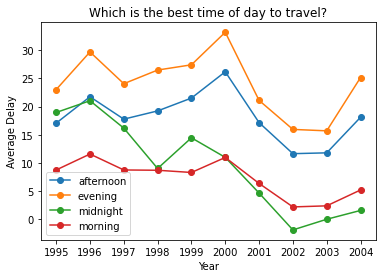

In [23]:
import matplotlib.pyplot as plt

# Create a list of times of day
times_of_day = list(average_delay_by_timeofday.values())[0].index

# Plot the data for each time of day
for time_of_day in times_of_day:
    # to store the year and avg_delay respectively 
    x_values = []
    y_values = []
    
    # Iterate over each year's data
    for year, avg_delay_df in average_delay_by_timeofday.items():
        x_values.append(year)
        y_values.append(avg_delay_df.loc[time_of_day])
    
    # using a line plot to show the trend of the delays over the years 
    plt.plot(x_values, y_values, marker='o', linestyle='-', label=time_of_day)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Average Delay')
plt.title('Which is the best time of day to travel?')
plt.legend()
plt.show()



In order to create the plot for each year, we have to first turn the dataframe into a list format and then using a for loop, we create 2 empty lists to store the years and the average delay, with each line representing a different time of day. 

In [24]:
# to calculate percentage of delayed flights by time ofday since we have already amended the DepDelay and ArrDelay column

delay_percentage_by_time_of_day = {}


for year, df in BestTOD.items():
    # group the flights by time of day
    total_flights_by_time_of_day = df.groupby('timeofday').size()
    
    # take flights with depdelay >0 since the column has already been amended
    delayed_flights = df[df['DepDelay'] > 0]
    
    # count the number of delayed flights for each time of day
    delayed_flights_by_time_of_day = delayed_flights.groupby('timeofday').size()
    
    # find the percentage of flights delayed
    delay_percentage_by_time_of_day[year] = (delayed_flights_by_time_of_day / total_flights_by_time_of_day) * 100

# Print the percentage of delayed flights by time of day for each year
for year, percentage_by_time_of_day in delay_percentage_by_time_of_day.items():
    print(f"Year {year}:")
    print(percentage_by_time_of_day)

    

Year 1995:
timeofday
afternoon    53.588289
evening      56.266030
midnight     45.411429
morning      42.302900
dtype: float64
Year 1996:
timeofday
afternoon    53.534407
evening      57.414443
midnight     45.094419
morning      41.068823
dtype: float64
Year 1997:
timeofday
afternoon    48.305889
evening      50.843896
midnight     41.214518
morning      35.365402
dtype: float64
Year 1998:
timeofday
afternoon    47.063177
evening      49.523479
midnight     34.072294
morning      33.832622
dtype: float64
Year 1999:
timeofday
afternoon    46.469599
evening      48.518828
midnight     36.834281
morning      31.626159
dtype: float64
Year 2000:
timeofday
afternoon    49.794662
evening      52.194481
midnight     33.034968
morning      34.379913
dtype: float64
Year 2001:
timeofday
afternoon    43.825899
evening      44.847882
midnight     25.905179
morning      31.229819
dtype: float64
Year 2002:
timeofday
afternoon    37.971777
evening      40.732149
midnight     23.051999
morning      2

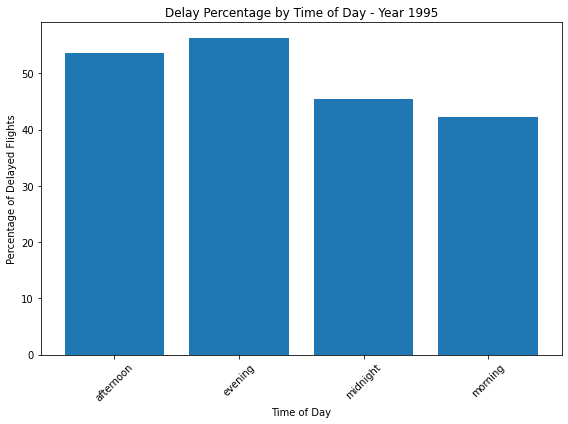

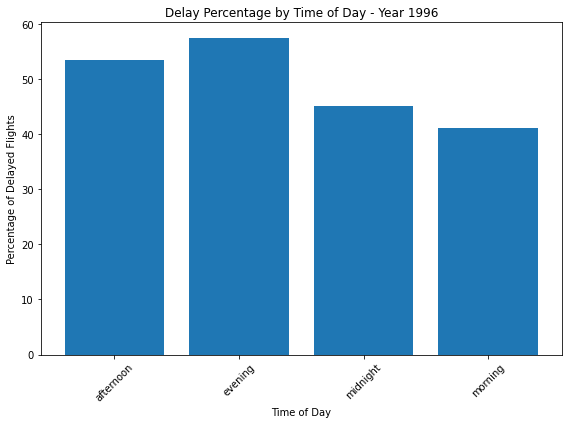

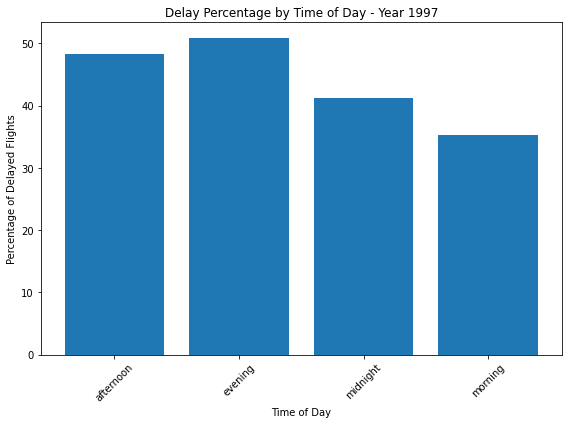

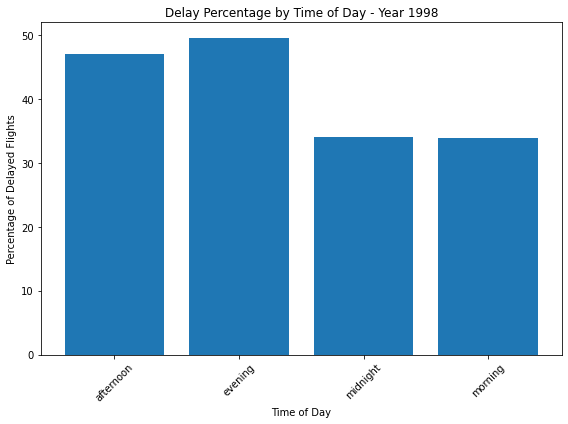

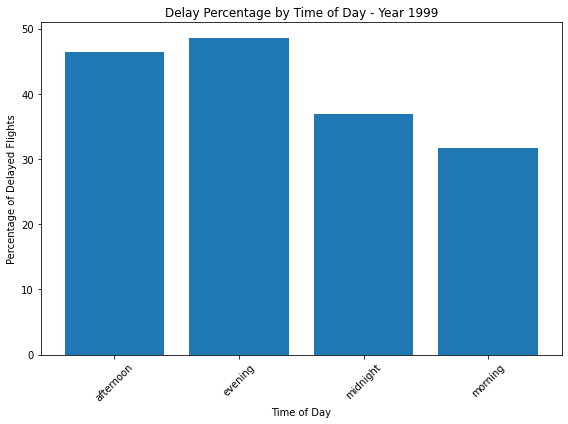

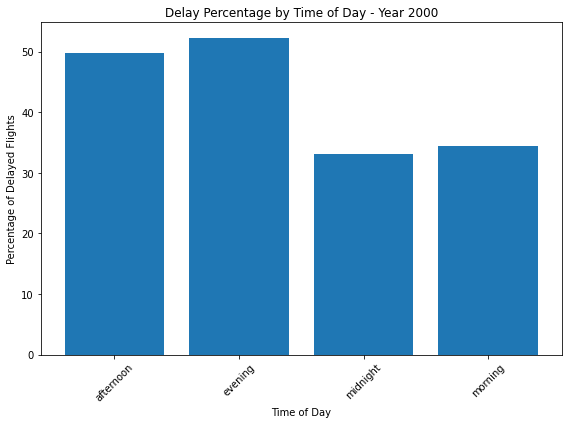

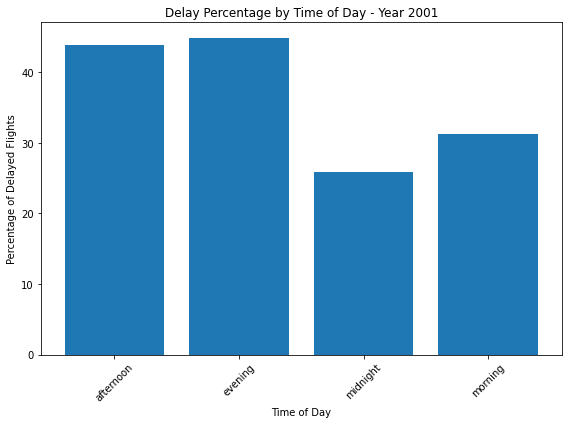

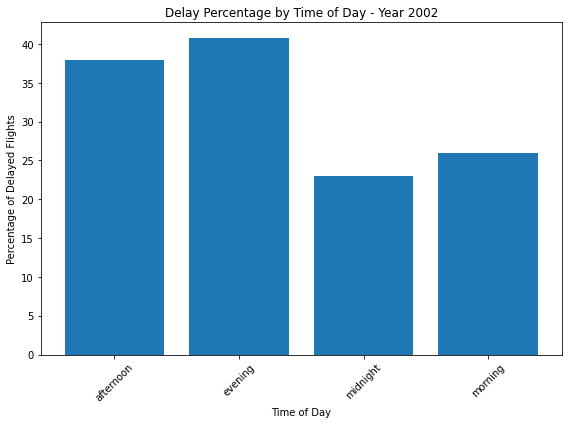

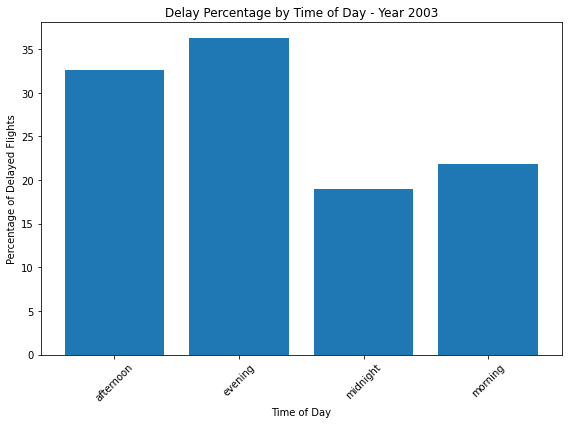

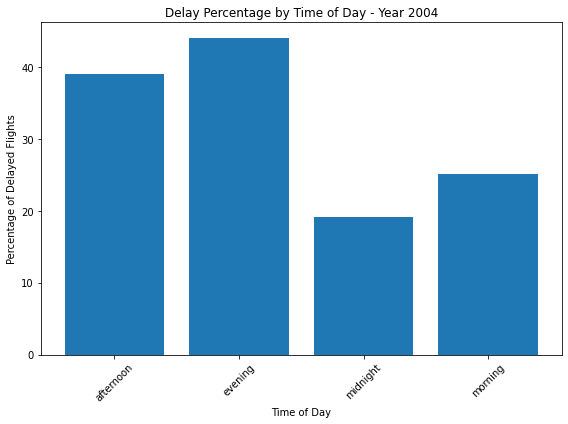

In [25]:
import matplotlib.pyplot as plt

# Iterate over each year's percentage of delayed flights by time of day
for year, percentage_by_time_of_day in delay_percentage_by_time_of_day.items():
    # Create a new figure for each year
    plt.figure(figsize=(8, 6))
    
    # Plot the percentage of delayed flights by time of day for the current year
    plt.bar(percentage_by_time_of_day.index, percentage_by_time_of_day.values)
    
    # Add labels and title
    plt.xlabel('Time of Day')
    plt.ylabel('Percentage of Delayed Flights')
    plt.title(f'Delay Percentage by Time of Day - Year {year}')
    
    # Customize the x-axis labels
    plt.xticks(rotation=45)
    
    # Show plot
    plt.tight_layout()
    plt.show()


In [26]:
keep_columns = ['DayOfWeek', 'DepDelay', 'ArrDelay']  # Adjust column names as needed

# Create the new dictionary with specified columns kept
Bestdayanalysis = {}

for year, df in ten_years.items():
    ncd_df = df[(df['Cancelled'] == 0) & (df['Diverted'] == 0)]
    
    bestday_df = df[keep_columns].copy()  # Select only the columns to keep and create a copy 
    # Store the modified DataFrame in the new dictionary
    Bestdayanalysis[year] = bestday_df


In [27]:
for year, df in Bestdayanalysis.items(): 
    # Update DepDelay column
    df['DepDelay'] = np.where(df['DepDelay'] < -60, df['DepDelay'].abs(), df['DepDelay'])

    # Update ArrDelay column
    df['ArrDelay'] = np.where(df['ArrDelay'] < -60, df['ArrDelay'].abs(), df['ArrDelay'])

    # Update the dictionary with the modified DataFrame
    Bestdayanalysis[year] = df

In [ ]:
print(Bestdayanalysis)

In [28]:
#  to store the average delays for each day for each year 
avg_delay_days = {}


for year, df in Bestdayanalysis.items():
    # create new column total delay
    df['TotalDelay'] = df['DepDelay'] + df['ArrDelay']
    
    # group by 'timeofday' and calculate the mean of the total delay for each group
    avg_delay_days[year] = df.groupby('DayOfWeek')['TotalDelay'].mean()

# see results
for year, avg_delay_df in avg_delay_days.items():
    print(f"Year {year}:")
    print(avg_delay_df)


Year 1995:
DayOfWeek
1.0    13.025957
2.0    13.669723
3.0    16.713690
4.0    17.524880
5.0    18.515291
6.0    13.126088
7.0    13.963512
Name: TotalDelay, dtype: float64
Year 1996:
DayOfWeek
1.0    18.398497
2.0    17.963935
3.0    19.114470
4.0    22.654819
5.0    25.534479
6.0    15.721581
7.0    17.466011
Name: TotalDelay, dtype: float64
Year 1997:
DayOfWeek
1.0    12.925583
2.0    11.739933
3.0    15.766918
4.0    18.495490
5.0    21.465671
6.0    13.052854
7.0    16.145310
Name: TotalDelay, dtype: float64
Year 1998:
DayOfWeek
1.0    15.912245
2.0    15.673965
3.0    15.846635
4.0    19.670477
5.0    21.188622
6.0    10.707232
7.0    16.209006
Name: TotalDelay, dtype: float64
Year 1999:
DayOfWeek
1.0    17.089941
2.0    13.986584
3.0    16.351428
4.0    20.150617
5.0    23.231873
6.0    13.575859
7.0    17.794076
Name: TotalDelay, dtype: float64
Year 2000:
DayOfWeek
1.0    19.386218
2.0    15.856554
3.0    19.274101
4.0    26.362770
5.0    30.820638
6.0    15.772765
7.0    23.72

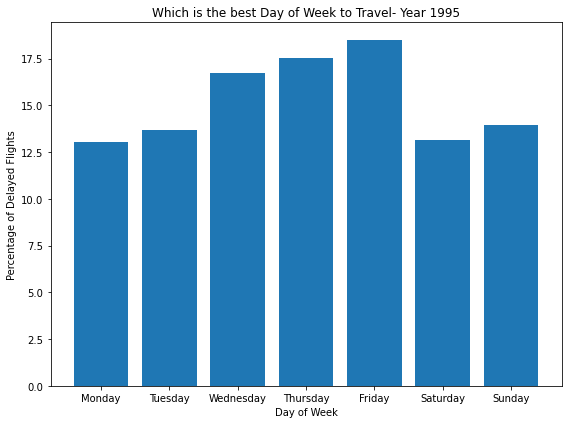

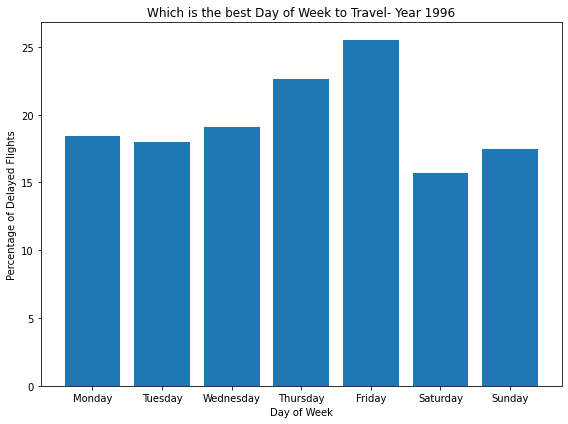

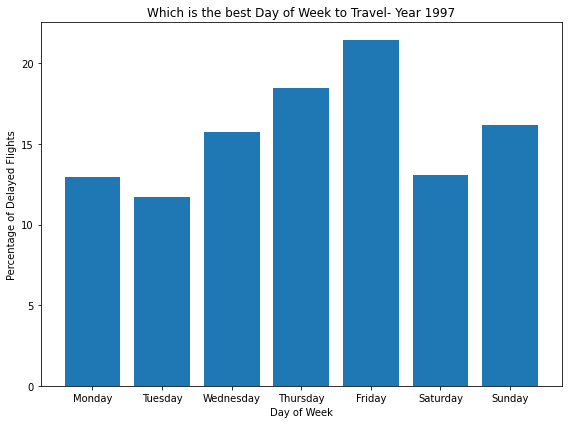

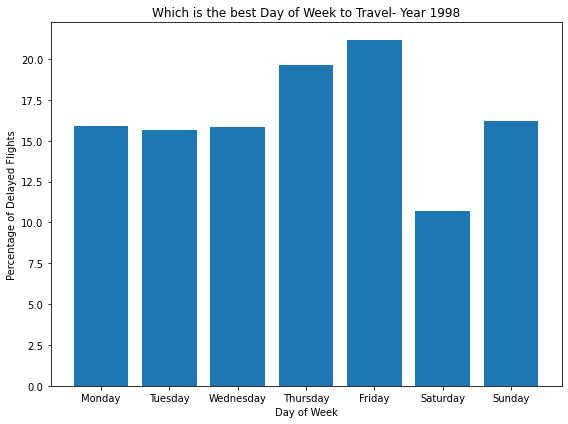

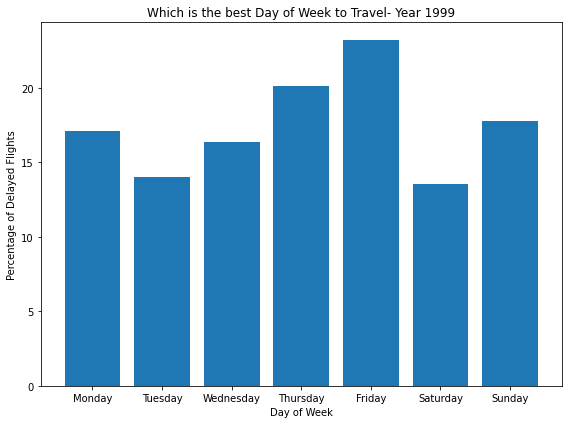

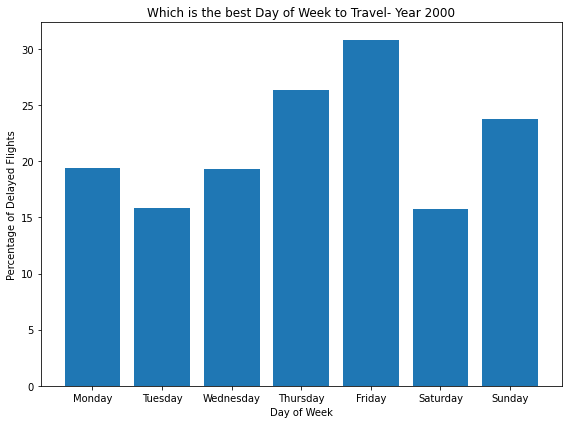

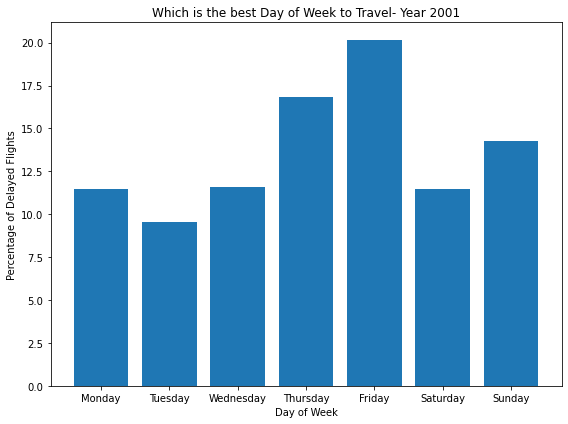

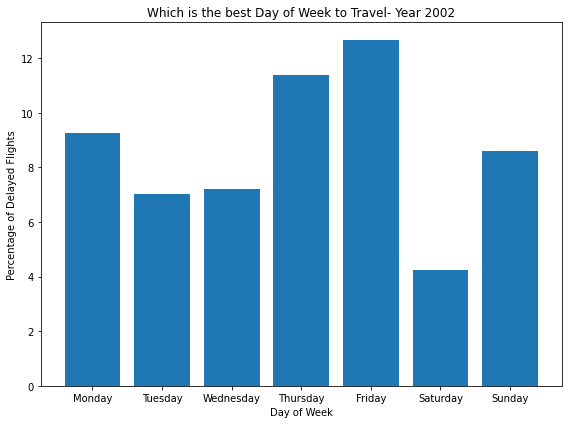

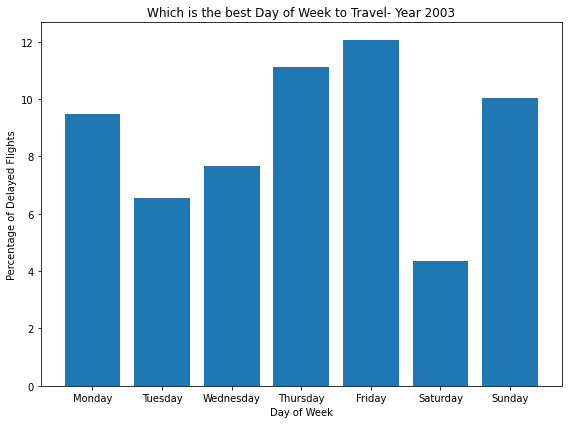

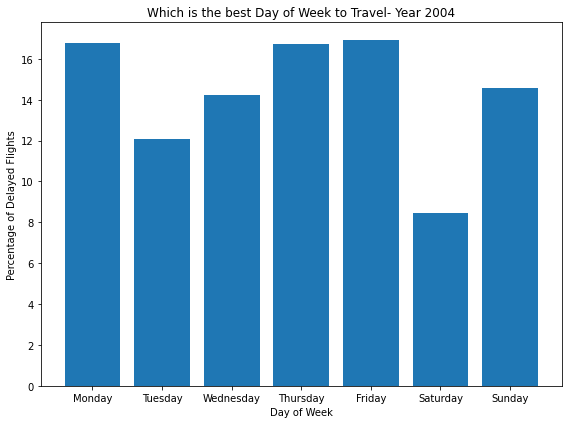

In [29]:
import matplotlib.pyplot as plt

# Since labels are currently in numerical form, we convert them
weekday_labels = {1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday', 7: 'Sunday'}

for year, avg_delay_df in avg_delay_days.items():
    plt.figure(figsize=(8, 6))
    
    weekday_names = [weekday_labels[label] for label in avg_delay_df.index]
    plt.bar(weekday_names, avg_delay_df.values)
    plt.xlabel('Day of Week')
    plt.ylabel('Percentage of Delayed Flights')
    plt.title(f'Which is the best Day of Week to Travel- Year {year}')
    plt.tight_layout()
    plt.show()



## To calc Age of Plane

In [20]:
planes_df = pd.read_csv('plane-data.csv')

In [ ]:
print(planes_df)

In [21]:
##Assuming that the year is the manufacture year, 
#first drop where issue_date is NaN 

planes_df = planes_df[planes_df['issue_date'].notna()]

planes_df['year'] = planes_df['year'].replace('None', np.nan).replace('0000', np.nan)

print(planes_df)

     tailnum                 type                   manufacturer  issue_date  \
34    N10156          Corporation                        EMBRAER  02/13/2004   
35    N102UW          Corporation               AIRBUS INDUSTRIE  05/26/1999   
36    N10323          Corporation                         BOEING  07/01/1997   
37    N103US          Corporation               AIRBUS INDUSTRIE  06/18/1999   
38    N104UA          Corporation                         BOEING  01/26/1998   
...      ...                  ...                            ...         ...   
5024  N997DL          Corporation  MCDONNELL DOUGLAS AIRCRAFT CO  03/11/1992   
5025  N998AT          Corporation                         BOEING  01/23/2003   
5026  N998DL          Corporation  MCDONNELL DOUGLAS CORPORATION  04/02/1992   
5027  N999CA  Foreign Corporation                       CANADAIR  07/09/2008   
5028  N999DN          Corporation  MCDONNELL DOUGLAS CORPORATION  04/02/1992   

            model status            air

In [57]:
#convert issue_date to datetime format 
planes_df['issue_date'] = pd.to_datetime(planes_df['issue_date'], format='%m/%d/%Y')


ValueError: time data 'None' does not match format '%m/%d/%Y' (match)

As we try to convert the issue_date to datetime format, we get an error showing that there is a row that contains None in the issue_date column. 

In [19]:
checknone = planes_df[(planes_df['issue_date'] == 'None')]
print(checknone)

     tailnum         type        manufacturer issue_date model  \
1529  N394AA  Corporation  AVIAT AIRCRAFT INC       None  A-1B   

                 status             aircraft_type    engine_type  year  
1529  Registered to Mfr  Fixed Wing Single-Engine  Reciprocating  2007  


In [22]:
# Filter rows where 'issue_date' is 'None' and drop them
planes_df = planes_df[planes_df['issue_date'] != 'None']



As we see that the year which we assume is the manufacture year, contains 2007, we will just remvoe the row since our analysis will be done based on the years 1995 - 2004, meaning that if this plane-data.csv is accurate, this plane should not be in any of the dataframes since it was only manufactured in the year 2007. Once that row is removed, we can then convert the issue_date to datetime format. 

In [23]:
planes_df['issue_date'] = pd.to_datetime(planes_df['issue_date'], format='%m/%d/%Y')


In [24]:
# Extract year from 'issue_date' and fill Na values in 'Year' column
planes_df['year'] = planes_df['year'].fillna(planes_df['issue_date'].dt.year)


Once it has been converted to date time format, we can then use this to extract the year from the issue_date column to the year column for the rows containing NA which we filled previously. 

In [63]:
print(planes_df)

     tailnum                 type                    manufacturer issue_date  \
34    N10156          Corporation                         EMBRAER 2004-02-13   
35    N102UW          Corporation                AIRBUS INDUSTRIE 1999-05-26   
36    N10323          Corporation                          BOEING 1997-07-01   
37    N103US          Corporation                AIRBUS INDUSTRIE 1999-06-18   
38    N104UA          Corporation                          BOEING 1998-01-26   
39    N104UW          Corporation                AIRBUS INDUSTRIE 1999-07-02   
40    N10575          Corporation                         EMBRAER 2003-06-24   
41    N105UA          Corporation                          BOEING 2007-10-15   
42    N105UW          Corporation                AIRBUS INDUSTRIE 1999-07-22   
43    N106US          Corporation                AIRBUS INDUSTRIE 1999-08-05   
44    N107UA          Corporation                          BOEING 1998-08-24   
45    N107US          Corporation       

In [25]:

# Convert 'year' column to datetime format
planes_df['year'] = pd.to_datetime(planes_df['year'], format='%Y')

# Add January 1st to the 'year' column
planes_df['year'] = planes_df['year'] + pd.offsets.DateOffset(month=1, day=1)

print(planes_df)


D:\Anaconda\lib\site-packages\pandas\core\arrays\datetimes.py:702: PerformanceWarning: Non-vectorized DateOffset being applied to Series or DatetimeIndex
  warnings.warn(


     tailnum                 type                   manufacturer issue_date  \
34    N10156          Corporation                        EMBRAER 2004-02-13   
35    N102UW          Corporation               AIRBUS INDUSTRIE 1999-05-26   
36    N10323          Corporation                         BOEING 1997-07-01   
37    N103US          Corporation               AIRBUS INDUSTRIE 1999-06-18   
38    N104UA          Corporation                         BOEING 1998-01-26   
...      ...                  ...                            ...        ...   
5024  N997DL          Corporation  MCDONNELL DOUGLAS AIRCRAFT CO 1992-03-11   
5025  N998AT          Corporation                         BOEING 2003-01-23   
5026  N998DL          Corporation  MCDONNELL DOUGLAS CORPORATION 1992-04-02   
5027  N999CA  Foreign Corporation                       CANADAIR 2008-07-09   
5028  N999DN          Corporation  MCDONNELL DOUGLAS CORPORATION 1992-04-02   

            model status            aircraft_type e

As we only converted the issue_date column to datetime previously, after extracting the year values from it, we then convert the entire column so that the entire columns becomes datetime format, which will allow us to add the first day of January to each row. This will help us later in calculting the age of the plane from the last day of the year. 

In [35]:
plane_analysis = {}
columns = ['Year', 'TailNum', 'CRSDepTime', 'DepDelay', 'ArrDelay', 'Origin', 'Dest', 'UniqueCarrier', 'Distance', 'AirTime']

for year, df in ten_years.items():
    # Filter out rows where both 'Cancelled' and 'Diverted' are equal to 0
    ncd_df = df[(df['Cancelled'] == 0) & (df['Diverted'] == 0)]
    
    # Add the 'Year' column with the current year value
    ncd_df['Year'] = year
    
    # Select the desired columns
    new_df = ncd_df[columns]
    
    # Store the DataFrame in the dictionary with the year as key
    plane_analysis[year] = new_df



In [29]:
planes_df2 = planes_df[['tailnum','issue_date', 'year']].copy()

We create a copy of the planes_df with only the necessary columns. 

In [33]:
merged_data = {}

for year, df in plane_analysis.items():
    merged_df = pd.merge(df, planes_df2, left_on='TailNum', right_on = 'tailnum' ,how='inner')
    merged_data[year] = merged_df


We then perform an inner merge to only match those TailNums that exist in the plane-data csv file since those are the only ones that have the manufacture date. 

In [38]:
print(merged_data)


{'1995':          Year TailNum CRSDepTime  DepDelay  ArrDelay Origin Dest  \
0        1995  N929UA       1145       3.0      -7.0    ORD  PHL   
1        1995  N929UA       1645      45.0      36.0    ORD  PVD   
2        1995  N929UA       1645       3.0      -4.0    ORD  PVD   
3        1995  N929UA       0839      11.0      -8.0    DEN  RNO   
4        1995  N929UA       0930       1.0     -13.0    ORD  SAT   
...       ...     ...        ...       ...       ...    ...  ...   
1650809  1995  N771UA       1700       8.0      15.0    ORD  DEN   
1650810  1995  N771UA       1700       5.0       3.0    ORD  DEN   
1650811  1995  N771UA       0810       0.0      -3.0    ORD  DEN   
1650812  1995  N771UA       1905       0.0      11.0    ORD  DEN   
1650813  1995  N771UA       1905     112.0     134.0    ORD  DEN   

        UniqueCarrier  Distance tailnum    model       year  
0                  UA     678.0  N929UA  737-522 1992-01-01  
1                  UA     849.0  N929UA  737-522 1

In [36]:
import pandas as pd

dfs = []

for year, df in merged_data.items():
    dfs.append(df)

# Concatenate the list of DataFrames into a single DataFrame
planes_merge_df = pd.concat(dfs, ignore_index=True)



Once the merge is done, we then combine the dictionary items to form a dataframe so that we can perform the manipulation easily. 

In [37]:
print(planes_merge_df)

          Year TailNum CRSDepTime  DepDelay  ArrDelay Origin Dest  \
0         1995  N929UA       1145       3.0      -7.0    ORD  PHL   
1         1995  N929UA       1645      45.0      36.0    ORD  PVD   
2         1995  N929UA       1645       3.0      -4.0    ORD  PVD   
3         1995  N929UA       0839      11.0      -8.0    DEN  RNO   
4         1995  N929UA       0930       1.0     -13.0    ORD  SAT   
...        ...     ...        ...       ...       ...    ...  ...   
21231193  2004  N14308       0820      -5.0       3.0    MCO  CLE   
21231194  2004  N14308       1745       5.0      23.0    RDU  EWR   
21231195  2004  N14308       0850      -2.0     -20.0    EWR  DTW   
21231196  2004  N14308       0700      13.0      10.0    PVD  EWR   
21231197  2004  N14308       1430      -5.0     -17.0    IAH  OKC   

         UniqueCarrier  Distance tailnum    model       year  
0                   UA     678.0  N929UA  737-522 1992-01-01  
1                   UA     849.0  N929UA  737

In [44]:
planes_merge_df['Date'] = planes_merge_df['Year'].copy()


planes_merge_df['Date'] = pd.to_datetime(planes_merge_df['Date'], format='%Y')

# append final date of the given year
planes_merge_df['Date'] = planes_merge_df['Date'] + pd.offsets.YearEnd(0)

# calculate age of plane based on manufacture date
planes_merge_df['AgeOfPlane'] = planes_merge_df['Date'] - planes_merge_df['year']

# amending the delay times to account for negative values
planes_merge_df['DepDelay'] = np.where(planes_merge_df['DepDelay'] < -60, planes_merge_df['DepDelay'].abs(), planes_merge_df['DepDelay'])
planes_merge_df['ArrDelay'] = np.where(planes_merge_df['ArrDelay'] < -60, planes_merge_df['ArrDelay'].abs(), planes_merge_df['ArrDelay'])

# create new column total delay 
planes_merge_df['TotalDelay'] = planes_merge_df['DepDelay'] + planes_merge_df['ArrDelay']

grouped_data = planes_merge_df.groupby(['Year', 'TailNum']).agg({'TotalDelay': 'sum', 'AgeOfPlane': 'max'})

grouped_data = grouped_data.sort_values(by = 'AgeOfPlane', ascending = False )

# Display the result
print(grouped_data)


              TotalDelay AgeOfPlane
Year TailNum                       
2004 N381AA       2788.0 17897 days
2003 N381AA       2871.0 17531 days
2004 N3744D       7904.0 17531 days
2002 N381AA       3197.0 17166 days
2003 N3744D       4620.0 17165 days
...                  ...        ...
1996 N607DL      44120.0 -3653 days
     N544AA      24196.0 -3653 days
1995 N380AA       3471.0 -4019 days
     N607DL      36894.0 -4019 days
     N544AA      18628.0 -4019 days

[16749 rows x 2 columns]


Here, we create a new Date column which basically makes use of the year column to give us the final date of each year. This will then be used to calculate the difference in days between the current final date of the year and the manufactured date of the plane. We then group the data by year and tailnum and calculate the sum of the delays and the age of the plane. 

In [46]:
grouped_data_filtered = grouped_data[grouped_data['AgeOfPlane'].dt.days > 0]


As there are negative values, these are presumed to be errors in the plane-data.csv file or it could be due to having filled the manufacture date based on the year from issue_date if it was empty. 

In [47]:
print(grouped_data_filtered)

              TotalDelay AgeOfPlane
Year TailNum                       
2004 N381AA       2788.0 17897 days
2003 N381AA       2871.0 17531 days
2004 N3744D       7904.0 17531 days
2002 N381AA       3197.0 17166 days
2003 N3744D       4620.0 17165 days
...                  ...        ...
     N369NB        496.0   364 days
     N366NB       1148.0   364 days
     N365NB       -368.0   364 days
     N592HA       1918.0   364 days
     N592NW       3814.0   364 days

[16660 rows x 2 columns]


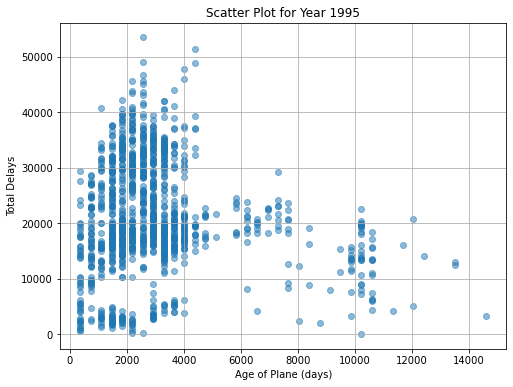

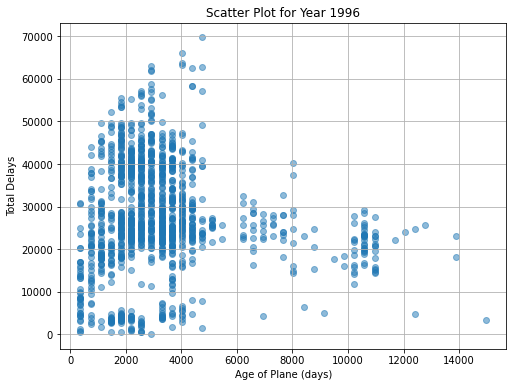

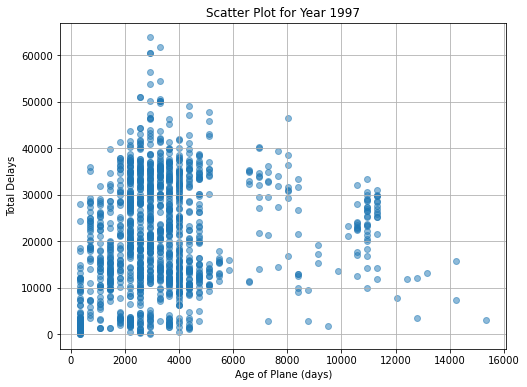

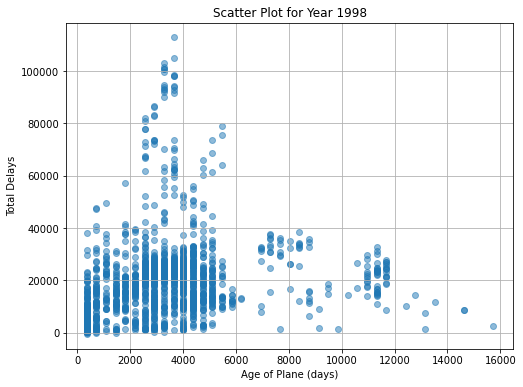

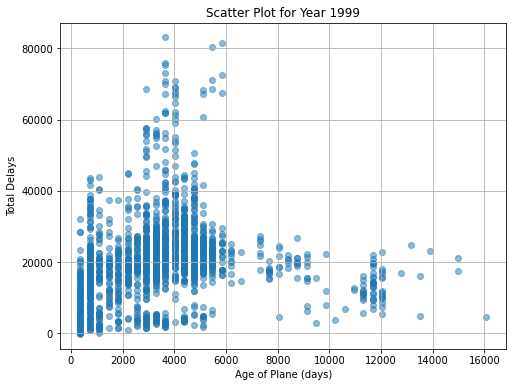

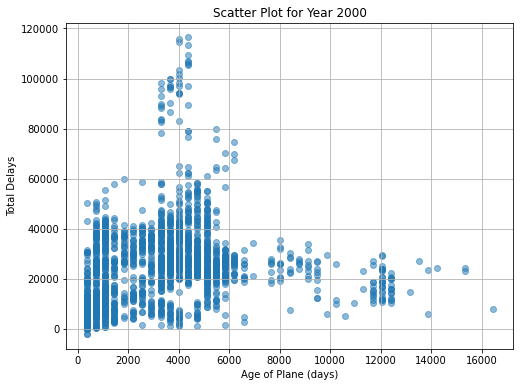

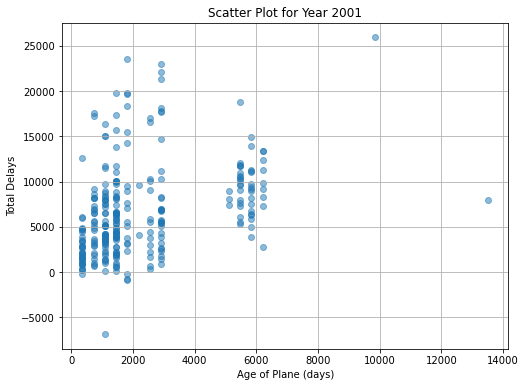

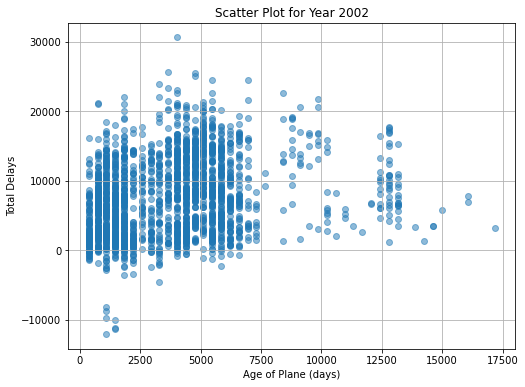

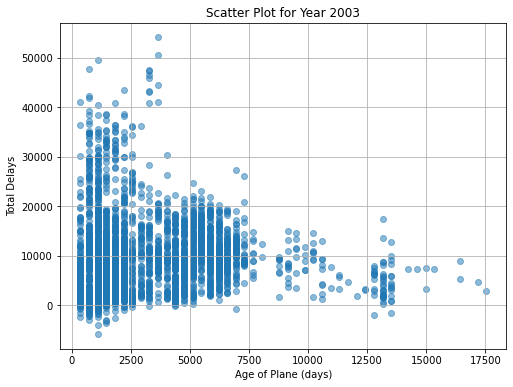

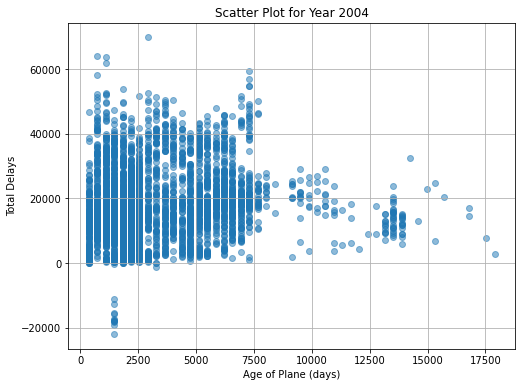

In [49]:
import matplotlib.pyplot as plt

# Iterate over each year and plot scatter plot
for year, data in grouped_data_filtered.groupby('Year'):
    plt.figure(figsize=(8, 6))
    plt.scatter(data['AgeOfPlane'].dt.days, data['TotalDelay'], alpha=0.5)
    plt.title(f'Scatter Plot for Year {year}')
    plt.xlabel('Age of Plane (days)')
    plt.ylabel('Total Delays')
    plt.grid(True)
    plt.show()


We then print out a scatter plot to observe if it is true that older planes cause more delays. This does not seem to be true as the overall distribution of the age of the planes seem to be towards the left and the planes that are older also seem to be causing lesser delays. 

## By AirTime

In [36]:
By_Airtime = {}

# Iterate over each year's DataFrame in plane_analysis
for year, df in plane_analysis.items():
    # Merge with planes_df2 on the common column(s)
    merged_df = pd.merge(df, planes_df2, left_on='TailNum', right_on = 'tailnum' ,how='left')
    
    # Store the merged DataFrame in a new dictionary
    By_Airtime[year] = merged_df


As the previous analysis was done based on matching the TailNums, we want to perform another analysis based on the AirTime each plane has went through and see if the assumption holds that the longer airtime means more delays. 

In [37]:
import pandas as pd

# Initialize a dictionary to store results
summary_data = {}

# Iterate over each year's DataFrame in By_distance
for year, df in By_Airtime.items():
    df['DepDelay'] = np.where(df['DepDelay'] < -60, df['DepDelay'].abs(),df['DepDelay'])
    df['ArrDelay'] = np.where(df['ArrDelay'] < -60, df['ArrDelay'].abs(), df['ArrDelay'])
    df['TotalDelay'] = df['ArrDelay'] + df['DepDelay']
 # group by tailnum and find the sum of delays
    summary = df.groupby('TailNum').agg({'AirTime': 'sum', 'TotalDelay': 'sum'})
    summary_data[year] = summary

print(summary_data)


{'1995':           AirTime  TotalDelay
TailNum                      
112      202591.0     35735.0
EIBOM     38672.0      7810.0
EIBON     42021.0      5528.0
EIBWD    208446.0     37280.0
EICAL     38118.0      5314.0
...           ...         ...
N998R    145966.0     22552.0
N998UA   143012.0     26042.0
N999DN   168633.0     32198.0
NCHD        117.0        26.0
NN7324    23160.0      4810.0

[3505 rows x 2 columns], '1996':           AirTime  TotalDelay
TailNum                      
112      181574.0     46809.0
EIBWD    221041.0     38255.0
EICAL     13989.0      2946.0
EICAM     32499.0      9126.0
EICIW    213105.0     39350.0
...           ...         ...
N998R    145014.0     30687.0
N998UA   147992.0     34490.0
N999DN   164853.0     43526.0
NEIDLA     1423.0       430.0
XXXXXX      185.0        -2.0

[3499 rows x 2 columns], '1997':           AirTime  TotalDelay
TailNum                      
112      182714.0     25140.0
EIBWD    160453.0     21428.0
EICIW     60849.0      

In [38]:
dfs = []

for year, summary in summary_data.items():
    # create year column
    summary['Year'] = year
    dfs.append(summary)

summary_df = pd.concat(dfs)

# Group the summary data by 'Year' and 'TailNum'
grouped_summary = summary_df.groupby(['Year', 'TailNum']).agg({'AirTime': 'sum', 'TotalDelay': 'sum'})

print(grouped_summary)

               AirTime  TotalDelay
Year TailNum                      
1995 112      202591.0     35735.0
     EIBOM     38672.0      7810.0
     EIBON     42021.0      5528.0
     EIBWD    208446.0     37280.0
     EICAL     38118.0      5314.0
...                ...         ...
2004 n408ca   140174.0     27360.0
     n409ca   139073.0     29554.0
     n466ca   124200.0      7027.0
     n815ca   144723.0     20387.0
     n816ca   146038.0     33263.0

[43468 rows x 2 columns]


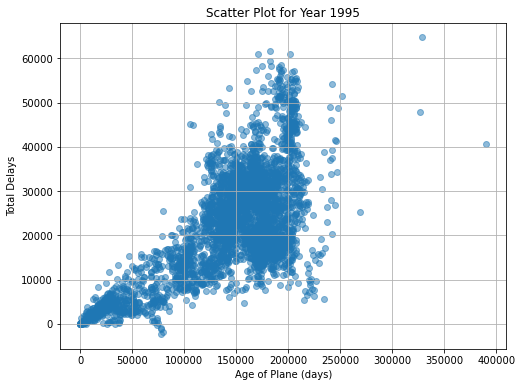

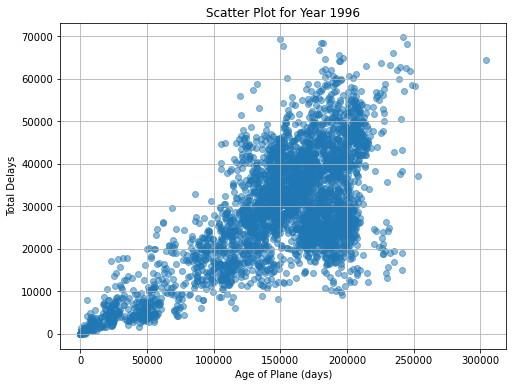

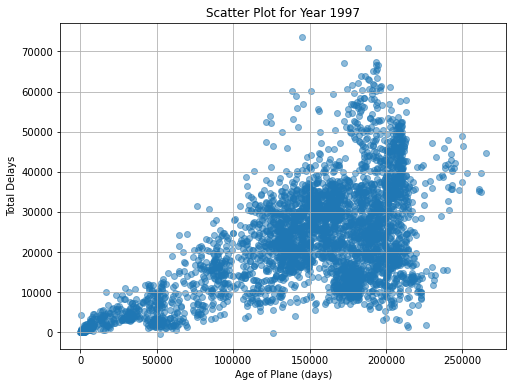

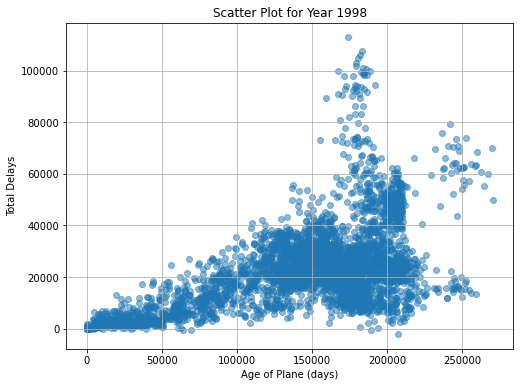

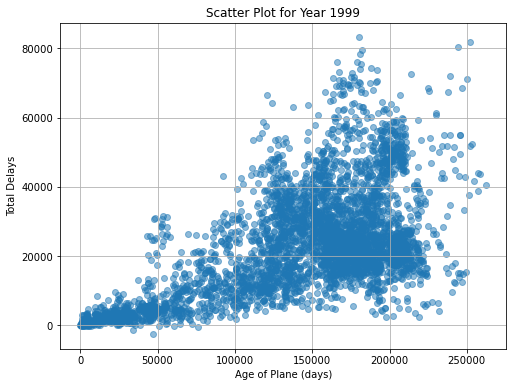

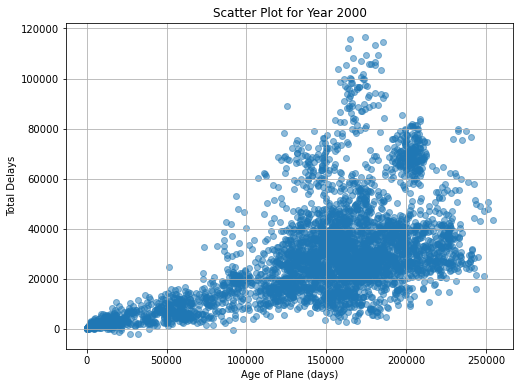

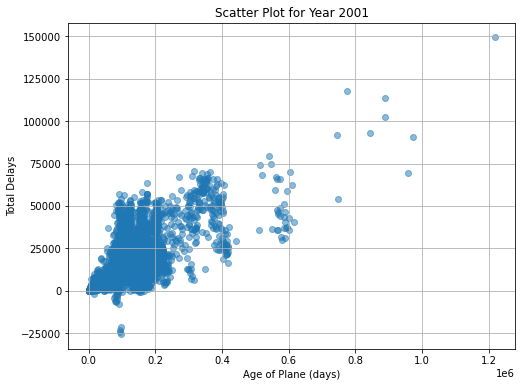

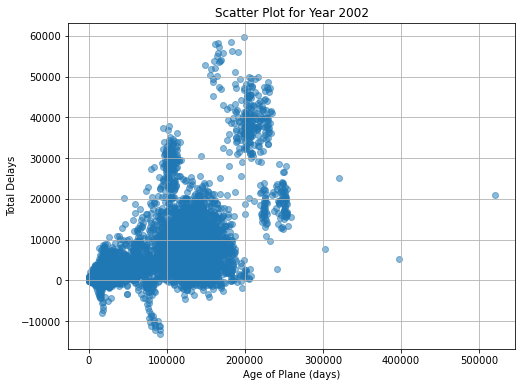

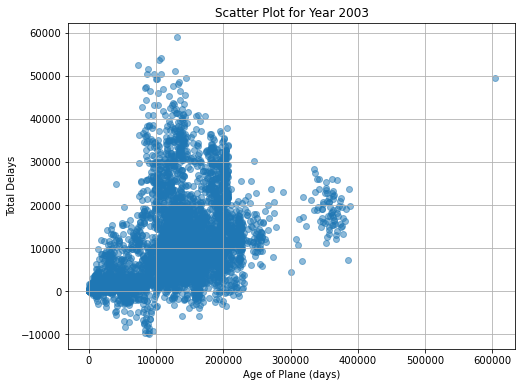

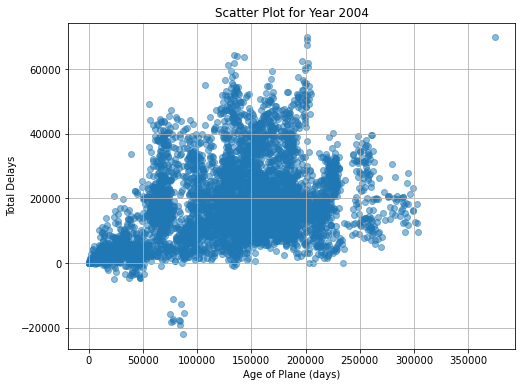

In [40]:
import matplotlib.pyplot as plt

# Iterate over each year and plot scatter plot
for year, data in grouped_summary.groupby('Year'):
    plt.figure(figsize=(8, 6))
    plt.scatter(data['AirTime'], data['TotalDelay'], alpha=0.5)
    plt.title(f'Scatter Plot for Year {year}')
    plt.xlabel('Age of Plane (days)')
    plt.ylabel('Total Delays')
    plt.grid(True)
    plt.show()


Since the above analysis was done based on only the manufacture date, it might have left out quite a few planes where the TailNums were not updated in the plane-data csv file. As such in order to further our observation, we can use the AirTime as the next variable to compare if the overall usage of the plane affects the delays. 

Although it seemed to be true for 1995-2000, the remaining years do not seem to indicate as such. 

Therefore, for further analysis, we definitely need more information since these are based purely on just flight delays and does not indicate the performance of the plane. 

## Logistic regression model

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml  #using openml to import data
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import train_test_split, GridSearchCV      
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer #transform different types

In [31]:
airports_df = pd.read_csv('airports.csv')

We import the airports csv so that we can access the longitude and latitude of the airports. 

We perform a merge based on the Origin and iata from the airports file in order to obtain the latitude and longitue of each airport. However since this will give us clashing column names which might be confusing, after each merge, we rename the columns by adding the Origin and Dest respectively behind those columns. 

Once this is done, we then filter down the columns that we will be using for our logistic regression and then use the year as the key for our dictionary. 

In [20]:
print(ten_years['1995'])

           Year  Month  DayofMonth  DayOfWeek DepTime CRSDepTime ArrTime  \
0        1995.0    1.0         6.0        5.0    0657       0645    0952   
1        1995.0    1.0         7.0        6.0    0648       0645    0938   
2        1995.0    1.0         8.0        7.0    0649       0645    0932   
3        1995.0    1.0         9.0        1.0    0645       0645    0928   
4        1995.0    1.0        10.0        2.0    0645       0645    0931   
...         ...    ...         ...        ...     ...        ...     ...   
5327430  1995.0   12.0        12.0        2.0    2217       2215    2332   
5327431  1995.0   12.0        13.0        3.0    2216       2215    2355   
5327432  1995.0   12.0        14.0        4.0    2215       2215    2341   
5327433  1995.0   12.0        15.0        5.0    2236       2215    2348   
5327434  1995.0   12.0        17.0        7.0    2215       2215    2328   

        CRSArrTime UniqueCarrier  FlightNum  ... TaxiIn  TaxiOut  Cancelled  \
0       

In [32]:
data_1995 = ten_years['1995']
data_1995 = pd.merge(data_1995, airports_df, left_on='Origin', right_on='iata', how='left')
data_1995.rename(columns={'lat': 'lat_Origin', 'long': 'long_Origin'}, inplace=True)
    
data_1995 = pd.merge(data_1995, airports_df, left_on='Dest', right_on='iata', how='left')
data_1995.rename(columns={'lat': 'lat_Dest', 'long': 'long_Dest'}, inplace=True)
    
data_1995 = data_1995[['Distance', 'Diverted', 'CRSDepTime', 'CRSArrTime', 'Month', 'DayofMonth', 'UniqueCarrier', 'lat_Origin', 'long_Origin', 'lat_Dest', 'long_Dest']]
    
print(data_1995)

         Distance  Diverted CRSDepTime CRSArrTime  Month  DayofMonth  \
0           678.0       0.0       0645       0937    1.0         6.0   
1           678.0       0.0       0645       0937    1.0         7.0   
2           678.0       0.0       0645       0937    1.0         8.0   
3           678.0       0.0       0645       0937    1.0         9.0   
4           678.0       0.0       0645       0937    1.0        10.0   
...           ...       ...        ...        ...    ...         ...   
5327430     770.0       0.0       2215       2332   12.0        12.0   
5327431     770.0       0.0       2215       2332   12.0        13.0   
5327432     770.0       0.0       2215       2332   12.0        14.0   
5327433     770.0       0.0       2215       2332   12.0        15.0   
5327434     770.0       0.0       2215       2332   12.0        17.0   

        UniqueCarrier  lat_Origin  long_Origin   lat_Dest   long_Dest  
0                  UA   41.979595   -87.904464  39.871953  -75.

We perform a merge based on the Origin and iata from the airports file in order to obtain the latitude and longitue of each airport. However since this will give us clashing column names which might be confusing, after each merge, we rename the columns by adding the Origin and Dest respectively behind those columns. 

Since the dictionary already contains the most updated information, we will access it using the year. 

Since running the entire dictionary is not possible for my laptop, the logistic regression results will have to be run individually. 

In [33]:
data_1995['Distance'].fillna(data_1995['Distance'].mean(), inplace=True)
#because 1995 has NA values we need to fill first 

In [34]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Fit and transform the categorical variable
data_1995['UniqueCarrier'] = label_encoder.fit_transform(data_1995['UniqueCarrier'])

features = ['Distance', 'CRSDepTime', 'CRSArrTime', 'Month', 'DayofMonth', 'UniqueCarrier', 'lat_Origin', 'long_Origin', 'lat_Dest', 'long_Dest'] ##independent variables used to predict dependent var
X = data_1995[features].copy()
y= data_1995['Diverted'].copy()

As the UniqueCarrier column currently contains characters, we have to first transform them into unique numeric values and this is done for each dataframe.

As the distance column contains NA values, we impute the distance with the mean. 

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5,random_state=1) 

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

We have to first create the train and test set, where X is our independent variables and y is our dependent variable, in this case the diverted column. 

Once this is done, we use 50% of the dataframe as the test set and fit it to the model. 

In [36]:
# to get the coefficients and feature names
coefficients = model.coef_[0]
feature_names = X_train.columns

# see the coefficients based on the feature
for feature, coefficient in zip(feature_names, coefficients):
    print(f"{feature}: {coefficient}")

Distance: 0.0005163205962066316
CRSDepTime: -5.9427879703425074e-05
CRSArrTime: -0.00028939598298924964
Month: -0.04834861525746077
DayofMonth: -0.015111788668433834
UniqueCarrier: 0.013656998252840634
lat_Origin: -0.0419720716665881
long_Origin: 0.015001843218382927
lat_Dest: -0.03600902155037638
long_Dest: 0.015448222716655989


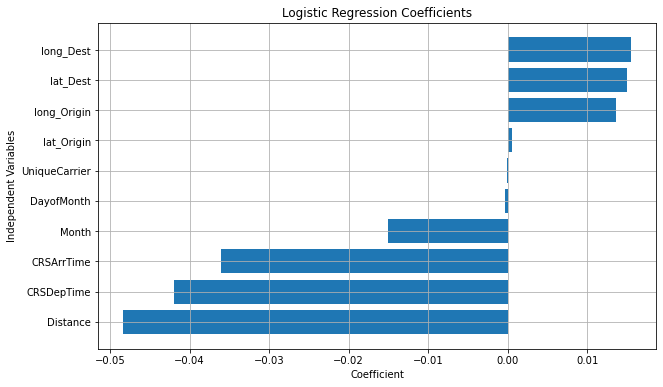

In [39]:
import matplotlib.pyplot as plt

# Get the coefficients and feature names
coefficients = sorted(model.coef_[0])
feature_names = X_train.columns

# Plot the coefficients
plt.figure(figsize=(10, 6))
plt.barh(feature_names, coefficients)
plt.xlabel('Coefficient')
plt.ylabel('Independent Variables')
plt.title('Logistic Regression Coefficients')
plt.grid(True)
plt.show()

Distance: 0.0006708253248880791
CRSDepTime: -6.44123536453569e-05
CRSArrTime: -0.0001757044426987805
Month: -0.04436187617768287
DayofMonth: -0.005754914704309375
UniqueCarrier: 0.002027527364028596
lat_Origin: -0.03775995828937191
long_Origin: 0.020329733614329222
lat_Dest: -0.020822905492745854
long_Dest: 0.018965939928429484


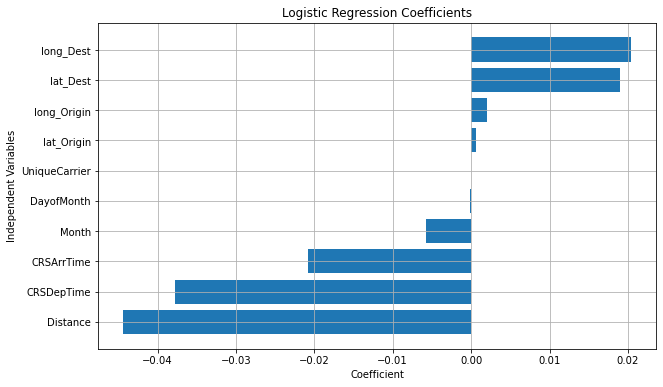

In [40]:
data_1996 = ten_years['1996']
data_1996 = pd.merge(data_1996, airports_df, left_on='Origin', right_on='iata', how='left')
data_1996.rename(columns={'lat': 'lat_Origin', 'long': 'long_Origin'}, inplace=True)
    
data_1996 = pd.merge(data_1996, airports_df, left_on='Dest', right_on='iata', how='left')
data_1996.rename(columns={'lat': 'lat_Dest', 'long': 'long_Dest'}, inplace=True)
    
data_1996 = data_1996[['Distance', 'Diverted', 'CRSDepTime', 'CRSArrTime', 'Month', 'DayofMonth', 'UniqueCarrier', 'lat_Origin', 'long_Origin', 'lat_Dest', 'long_Dest']]
    
label_encoder = LabelEncoder()

data_1996['UniqueCarrier'] = label_encoder.fit_transform(data_1996['UniqueCarrier'])

features = ['Distance', 'CRSDepTime', 'CRSArrTime', 'Month', 'DayofMonth', 'UniqueCarrier', 'lat_Origin', 'long_Origin', 'lat_Dest', 'long_Dest'] ##independent variables used to predict dependent var
X = data_1996[features].copy()
y= data_1996['Diverted'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5,random_state=1) 

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

coefficients = model.coef_[0]
feature_names = X_train.columns

for feature, coefficient in zip(feature_names, coefficients):
    print(f"{feature}: {coefficient}")
    
    
coefficients = sorted(model.coef_[0])
feature_names = X_train.columns

plt.figure(figsize=(10, 6))
plt.barh(feature_names, coefficients)
plt.xlabel('Coefficient')
plt.ylabel('Independent Variables')
plt.title('Logistic Regression Coefficients')
plt.grid(True)
plt.show()

Distance: 0.0006019928881392555
CRSDepTime: -3.581816136946852e-05
CRSArrTime: 0.0001921347893180866
Month: -0.020882857981051373
DayofMonth: 0.005319830444678074
UniqueCarrier: -0.02717178717379624
lat_Origin: 0.01241988218828592
long_Origin: 0.004069195914246313
lat_Dest: 0.023517695435108666
long_Dest: 0.003441752014473179


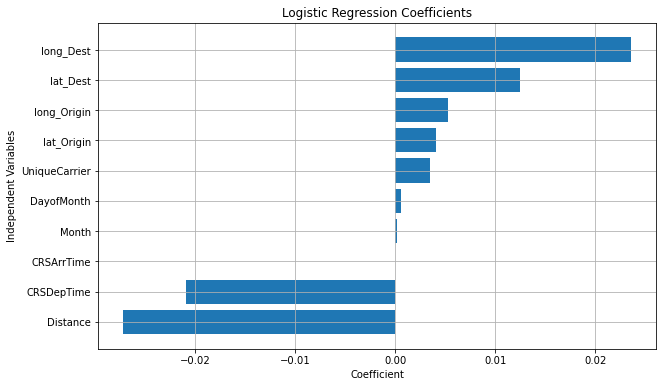

In [42]:
data_1997 = ten_years['1997']
data_1997 = pd.merge(data_1997, airports_df, left_on='Origin', right_on='iata', how='left')
data_1997.rename(columns={'lat': 'lat_Origin', 'long': 'long_Origin'}, inplace=True)
    
data_1997 = pd.merge(data_1997, airports_df, left_on='Dest', right_on='iata', how='left')
data_1997.rename(columns={'lat': 'lat_Dest', 'long': 'long_Dest'}, inplace=True)
    
data_1997 = data_1997[['Distance', 'Diverted', 'CRSDepTime', 'CRSArrTime', 'Month', 'DayofMonth', 'UniqueCarrier', 'lat_Origin', 'long_Origin', 'lat_Dest', 'long_Dest']]
    
label_encoder = LabelEncoder()

data_1997['UniqueCarrier'] = label_encoder.fit_transform(data_1997['UniqueCarrier'])

features = ['Distance', 'CRSDepTime', 'CRSArrTime', 'Month', 'DayofMonth', 'UniqueCarrier', 'lat_Origin', 'long_Origin', 'lat_Dest', 'long_Dest'] ##independent variables used to predict dependent var
X = data_1997[features].copy()
y= data_1997['Diverted'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5,random_state=1) 

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

coefficients = model.coef_[0]
feature_names = X_train.columns

for feature, coefficient in zip(feature_names, coefficients):
    print(f"{feature}: {coefficient}")
    
    
coefficients = sorted(model.coef_[0])
feature_names = X_train.columns

plt.figure(figsize=(10, 6))
plt.barh(feature_names, coefficients)
plt.xlabel('Coefficient')
plt.ylabel('Independent Variables')
plt.title('Logistic Regression Coefficients')
plt.grid(True)
plt.show()

Distance: 0.0007246726001285423
CRSDepTime: 2.842897868555984e-05
CRSArrTime: 0.00016104389308287424
Month: -0.02042577567610091
DayofMonth: -0.0010516132512850627
UniqueCarrier: 0.0006557422673485471
lat_Origin: 0.01272441199857655
long_Origin: 0.0070688767493941795
lat_Dest: 0.018826706896088504
long_Dest: -0.0016492441307032616


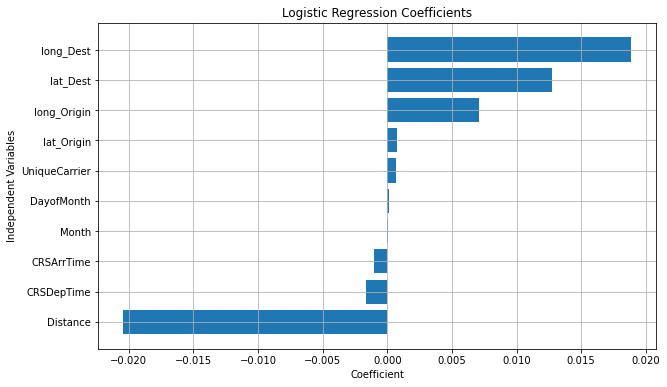

In [43]:
data_1998 = ten_years['1998']
data_1998 = pd.merge(data_1998, airports_df, left_on='Origin', right_on='iata', how='left')
data_1998.rename(columns={'lat': 'lat_Origin', 'long': 'long_Origin'}, inplace=True)
    
data_1998 = pd.merge(data_1998, airports_df, left_on='Dest', right_on='iata', how='left')
data_1998.rename(columns={'lat': 'lat_Dest', 'long': 'long_Dest'}, inplace=True)
    
data_1998 = data_1998[['Distance', 'Diverted', 'CRSDepTime', 'CRSArrTime', 'Month', 'DayofMonth', 'UniqueCarrier', 'lat_Origin', 'long_Origin', 'lat_Dest', 'long_Dest']]
    
label_encoder = LabelEncoder()

data_1998['UniqueCarrier'] = label_encoder.fit_transform(data_1998['UniqueCarrier'])

features = ['Distance', 'CRSDepTime', 'CRSArrTime', 'Month', 'DayofMonth', 'UniqueCarrier', 'lat_Origin', 'long_Origin', 'lat_Dest', 'long_Dest'] ##independent variables used to predict dependent var
X = data_1998[features].copy()
y= data_1998['Diverted'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5,random_state=1) 

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

coefficients = model.coef_[0]
feature_names = X_train.columns

for feature, coefficient in zip(feature_names, coefficients):
    print(f"{feature}: {coefficient}")
    
    
coefficients = sorted(model.coef_[0])
feature_names = X_train.columns

plt.figure(figsize=(10, 6))
plt.barh(feature_names, coefficients)
plt.xlabel('Coefficient')
plt.ylabel('Independent Variables')
plt.title('Logistic Regression Coefficients')
plt.grid(True)
plt.show()

Distance: 0.0005922532847289733
CRSDepTime: -0.00018721864937096912
CRSArrTime: 5.02133233944144e-05
Month: -0.08644128532109699
DayofMonth: -0.01966800740334978
UniqueCarrier: -0.016368172234034806
lat_Origin: -0.03356038265205584
long_Origin: 0.015649566159014174
lat_Dest: -0.022556717376329864
long_Dest: 0.020955471392817997


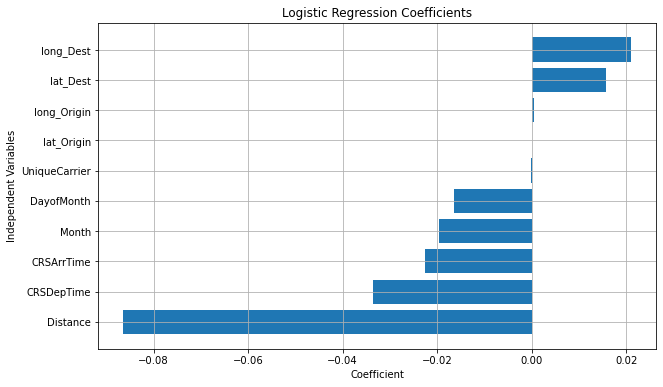

In [44]:
data_1999 = ten_years['1999']
data_1999 = pd.merge(data_1999, airports_df, left_on='Origin', right_on='iata', how='left')
data_1999.rename(columns={'lat': 'lat_Origin', 'long': 'long_Origin'}, inplace=True)
    
data_1999 = pd.merge(data_1999, airports_df, left_on='Dest', right_on='iata', how='left')
data_1999.rename(columns={'lat': 'lat_Dest', 'long': 'long_Dest'}, inplace=True)
    
data_1999 = data_1999[['Distance', 'Diverted', 'CRSDepTime', 'CRSArrTime', 'Month', 'DayofMonth', 'UniqueCarrier', 'lat_Origin', 'long_Origin', 'lat_Dest', 'long_Dest']]
    
label_encoder = LabelEncoder()

data_1999['UniqueCarrier'] = label_encoder.fit_transform(data_1999['UniqueCarrier'])

features = ['Distance', 'CRSDepTime', 'CRSArrTime', 'Month', 'DayofMonth', 'UniqueCarrier', 'lat_Origin', 'long_Origin', 'lat_Dest', 'long_Dest'] ##independent variables used to predict dependent var
X = data_1999[features].copy()
y= data_1999['Diverted'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5,random_state=1) 

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

coefficients = model.coef_[0]
feature_names = X_train.columns

for feature, coefficient in zip(feature_names, coefficients):
    print(f"{feature}: {coefficient}")
    
    
coefficients = sorted(model.coef_[0])
feature_names = X_train.columns

plt.figure(figsize=(10, 6))
plt.barh(feature_names, coefficients)
plt.xlabel('Coefficient')
plt.ylabel('Independent Variables')
plt.title('Logistic Regression Coefficients')
plt.grid(True)
plt.show()

Distance: 0.0004922689126738997
CRSDepTime: 6.161714424746017e-05
CRSArrTime: 0.0002854820588050064
Month: -0.01314335177635295
DayofMonth: 0.0019542435299587223
UniqueCarrier: -0.014007881969694887
lat_Origin: 0.013807030584450975
long_Origin: 0.0016621541922703822
lat_Dest: 0.01984710637054039
long_Dest: 0.00830053259693204


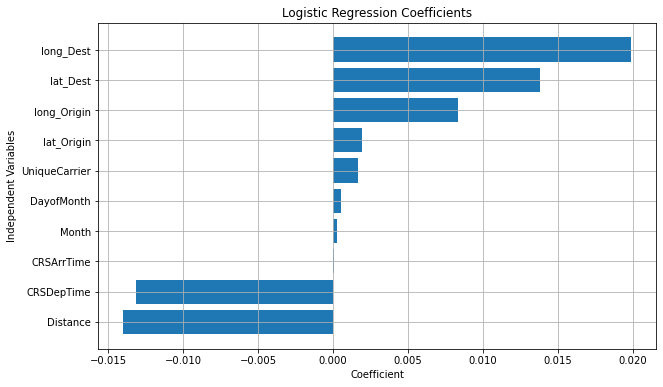

In [45]:
data_2000 = ten_years['2000']
data_2000 = pd.merge(data_2000, airports_df, left_on='Origin', right_on='iata', how='left')
data_2000.rename(columns={'lat': 'lat_Origin', 'long': 'long_Origin'}, inplace=True)
    
data_2000 = pd.merge(data_2000, airports_df, left_on='Dest', right_on='iata', how='left')
data_2000.rename(columns={'lat': 'lat_Dest', 'long': 'long_Dest'}, inplace=True)
    
data_2000 = data_2000[['Distance', 'Diverted', 'CRSDepTime', 'CRSArrTime', 'Month', 'DayofMonth', 'UniqueCarrier', 'lat_Origin', 'long_Origin', 'lat_Dest', 'long_Dest']]
    
label_encoder = LabelEncoder()

data_2000['UniqueCarrier'] = label_encoder.fit_transform(data_2000['UniqueCarrier'])

features = ['Distance', 'CRSDepTime', 'CRSArrTime', 'Month', 'DayofMonth', 'UniqueCarrier', 'lat_Origin', 'long_Origin', 'lat_Dest', 'long_Dest'] ##independent variables used to predict dependent var
X = data_2000[features].copy()
y= data_2000['Diverted'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5,random_state=1) 

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

coefficients = model.coef_[0]
feature_names = X_train.columns

for feature, coefficient in zip(feature_names, coefficients):
    print(f"{feature}: {coefficient}")
    
    
coefficients = sorted(model.coef_[0])
feature_names = X_train.columns

plt.figure(figsize=(10, 6))
plt.barh(feature_names, coefficients)
plt.xlabel('Coefficient')
plt.ylabel('Independent Variables')
plt.title('Logistic Regression Coefficients')
plt.grid(True)
plt.show()

Distance: 0.0005101029166315954
CRSDepTime: -0.0002855087408412714
CRSArrTime: -1.514905338191011e-05
Month: -0.03540427401311567
DayofMonth: -0.015792537057097718
UniqueCarrier: -0.013831369630417529
lat_Origin: -0.03698798432427524
long_Origin: 0.016993190283024307
lat_Dest: -0.027829211946541647
long_Dest: 0.018332769164309343


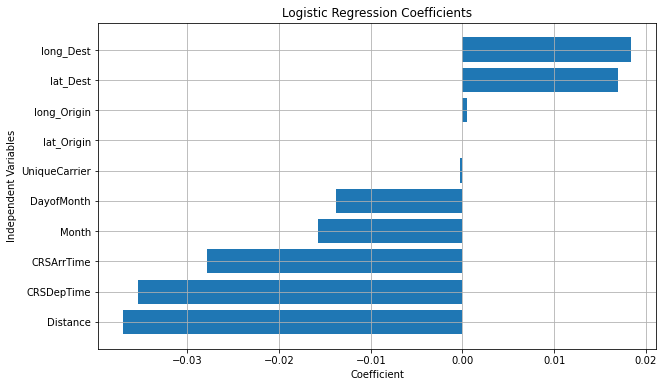

In [46]:
data_2001 = ten_years['2001']
data_2001 = pd.merge(data_2001, airports_df, left_on='Origin', right_on='iata', how='left')
data_2001.rename(columns={'lat': 'lat_Origin', 'long': 'long_Origin'}, inplace=True)
    
data_2001 = pd.merge(data_2001, airports_df, left_on='Dest', right_on='iata', how='left')
data_2001.rename(columns={'lat': 'lat_Dest', 'long': 'long_Dest'}, inplace=True)
    
data_2001 = data_2001[['Distance', 'Diverted', 'CRSDepTime', 'CRSArrTime', 'Month', 'DayofMonth', 'UniqueCarrier', 'lat_Origin', 'long_Origin', 'lat_Dest', 'long_Dest']]
    
label_encoder = LabelEncoder()

data_2001['UniqueCarrier'] = label_encoder.fit_transform(data_2001['UniqueCarrier'])

features = ['Distance', 'CRSDepTime', 'CRSArrTime', 'Month', 'DayofMonth', 'UniqueCarrier', 'lat_Origin', 'long_Origin', 'lat_Dest', 'long_Dest'] ##independent variables used to predict dependent var
X = data_2001[features].copy()
y= data_2001['Diverted'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5,random_state=1) 

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

coefficients = model.coef_[0]
feature_names = X_train.columns

for feature, coefficient in zip(feature_names, coefficients):
    print(f"{feature}: {coefficient}")
    
    
coefficients = sorted(model.coef_[0])
feature_names = X_train.columns

plt.figure(figsize=(10, 6))
plt.barh(feature_names, coefficients)
plt.xlabel('Coefficient')
plt.ylabel('Independent Variables')
plt.title('Logistic Regression Coefficients')
plt.grid(True)
plt.show()

Distance: 0.00037226184769787726
CRSDepTime: -0.0003106299219257792
CRSArrTime: 7.02967095232725e-05
Month: -0.021851992040531832
DayofMonth: -0.013554039867054229
UniqueCarrier: -0.03929072221056086
lat_Origin: -0.0417510244177082
long_Origin: 0.014208422135531903
lat_Dest: -0.03808401967841805
long_Dest: 0.018011274648591747


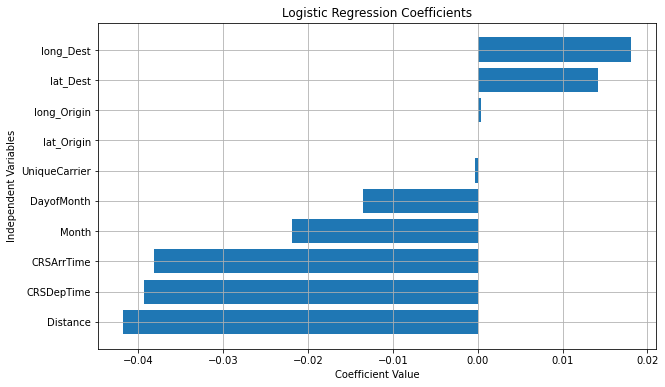

In [48]:
data_2002 = ten_years['2002']
data_2002 = pd.merge(data_2002, airports_df, left_on='Origin', right_on='iata', how='left')
data_2002.rename(columns={'lat': 'lat_Origin', 'long': 'long_Origin'}, inplace=True)
    
data_2002 = pd.merge(data_2002, airports_df, left_on='Dest', right_on='iata', how='left')
data_2002.rename(columns={'lat': 'lat_Dest', 'long': 'long_Dest'}, inplace=True)
    
data_2002 = data_2002[['Distance', 'Diverted', 'CRSDepTime', 'CRSArrTime', 'Month', 'DayofMonth', 'UniqueCarrier', 'lat_Origin', 'long_Origin', 'lat_Dest', 'long_Dest']]
    
label_encoder = LabelEncoder()

data_2002['UniqueCarrier'] = label_encoder.fit_transform(data_2002['UniqueCarrier'])

features = ['Distance', 'CRSDepTime', 'CRSArrTime', 'Month', 'DayofMonth', 'UniqueCarrier', 'lat_Origin', 'long_Origin', 'lat_Dest', 'long_Dest'] ##independent variables used to predict dependent var
X = data_2002[features].copy()
y= data_2002['Diverted'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5,random_state=1) 

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

coefficients = model.coef_[0]
feature_names = X_train.columns

for feature, coefficient in zip(feature_names, coefficients):
    print(f"{feature}: {coefficient}")
    
    
coefficients = sorted(model.coef_[0])
feature_names = X_train.columns

plt.figure(figsize=(10, 6))
plt.barh(feature_names, coefficients)
plt.xlabel('Coefficient Value')
plt.ylabel('Independent Variables')
plt.title('Logistic Regression Coefficients')
plt.grid(True)
plt.show()

Distance: 0.0005062612471654484
CRSDepTime: -9.668174973367622e-05
CRSArrTime: 0.00017493615535991666
Month: -0.00867145577267034
DayofMonth: -0.0074845623216913005
UniqueCarrier: -0.0018018398141512067
lat_Origin: 0.010964423855947158
long_Origin: 0.0009645721118137146
lat_Dest: 0.011229677846364076
long_Dest: 0.006059611376883256


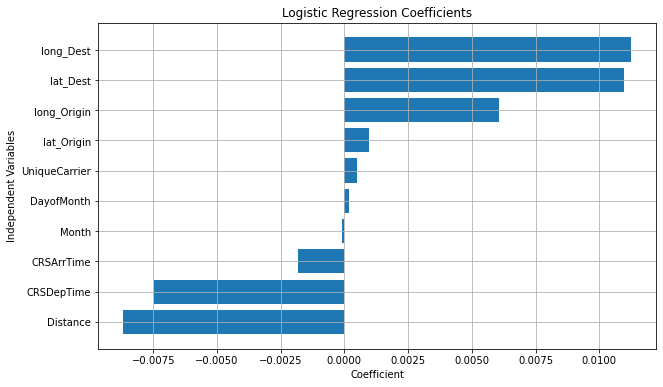

In [50]:
data_2003 = ten_years['2003']
data_2003 = pd.merge(data_2003, airports_df, left_on='Origin', right_on='iata', how='left')
data_2003.rename(columns={'lat': 'lat_Origin', 'long': 'long_Origin'}, inplace=True)
    
data_2003 = pd.merge(data_2003, airports_df, left_on='Dest', right_on='iata', how='left')
data_2003.rename(columns={'lat': 'lat_Dest', 'long': 'long_Dest'}, inplace=True)
    
data_2003 = data_2003[['Distance', 'Diverted', 'CRSDepTime', 'CRSArrTime', 'Month', 'DayofMonth', 'UniqueCarrier', 'lat_Origin', 'long_Origin', 'lat_Dest', 'long_Dest']]
    
label_encoder = LabelEncoder()

data_2003['UniqueCarrier'] = label_encoder.fit_transform(data_2003['UniqueCarrier'])

features = ['Distance', 'CRSDepTime', 'CRSArrTime', 'Month', 'DayofMonth', 'UniqueCarrier', 'lat_Origin', 'long_Origin', 'lat_Dest', 'long_Dest'] ##independent variables used to predict dependent var
X = data_2003[features].copy()
y= data_2003['Diverted'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5,random_state=1) 

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

coefficients = model.coef_[0]
feature_names = X_train.columns

for feature, coefficient in zip(feature_names, coefficients):
    print(f"{feature}: {coefficient}")
    
    
coefficients = sorted(model.coef_[0])
feature_names = X_train.columns

# Plot the coefficients
plt.figure(figsize=(10, 6))
plt.barh(feature_names, coefficients)
plt.xlabel('Coefficient')
plt.ylabel('Independent Variables')
plt.title('Logistic Regression Coefficients')
plt.grid(True)
plt.show()

Distance: 0.0004635253776367566
CRSDepTime: -0.00028772509592143227
CRSArrTime: 0.0004516952033933647
Month: 0.01831444328788911
DayofMonth: 0.003586601806673074
UniqueCarrier: 0.002513397805591044
lat_Origin: 0.009140042793284177
long_Origin: 0.0018897666957336347
lat_Dest: 0.006260026047187249
long_Dest: 0.0011451613102236584


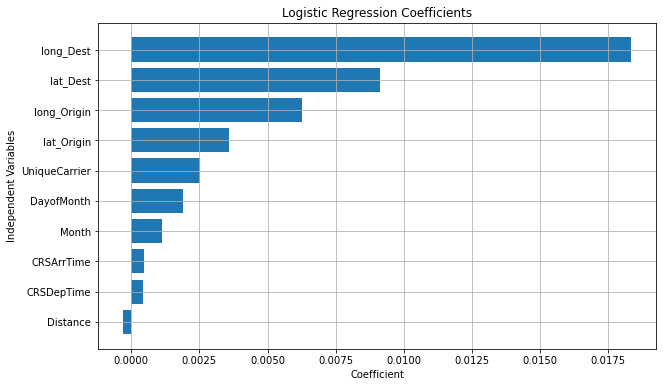

In [51]:
data_2004 = ten_years['2004']
data_2004 = pd.merge(data_2004, airports_df, left_on='Origin', right_on='iata', how='left')
data_2004.rename(columns={'lat': 'lat_Origin', 'long': 'long_Origin'}, inplace=True)
    
data_2004 = pd.merge(data_2004, airports_df, left_on='Dest', right_on='iata', how='left')
data_2004.rename(columns={'lat': 'lat_Dest', 'long': 'long_Dest'}, inplace=True)
    
data_2004 = data_2004[['Distance', 'Diverted', 'CRSDepTime', 'CRSArrTime', 'Month', 'DayofMonth', 'UniqueCarrier', 'lat_Origin', 'long_Origin', 'lat_Dest', 'long_Dest']].dropna()
    
label_encoder = LabelEncoder()


data_2004['UniqueCarrier'] = label_encoder.fit_transform(data_2004['UniqueCarrier'])

features = ['Distance', 'CRSDepTime', 'CRSArrTime', 'Month', 'DayofMonth', 'UniqueCarrier', 'lat_Origin', 'long_Origin', 'lat_Dest', 'long_Dest'] ##independent variables used to predict dependent var
X = data_2004[features].copy()
y= data_2004['Diverted'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5,random_state=1) 

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

coefficients = model.coef_[0]
feature_names = X_train.columns

for feature, coefficient in zip(feature_names, coefficients):
    print(f"{feature}: {coefficient}")
    
    
coefficients = sorted(model.coef_[0])
feature_names = X_train.columns

plt.figure(figsize=(10, 6))
plt.barh(feature_names, coefficients)
plt.xlabel('Coefficient')
plt.ylabel('Independent Variables')
plt.title('Logistic Regression Coefficients')
plt.grid(True)
plt.show()

Over the years, the coefficient for the distance actually decreased, meaning it might not have that much of a correlation with the dependent variable as much throughout the years. However the coefficient of the long_Dest actually increased meaning that it has a stronger relationship with the Diverted column.

However, since the dataset might be imbalanced, it might be true that the model is actually predicting based on non-diverted flights instead. 